In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
pd.read_csv("/projects/home/mmasood1/arslan_data_repository/Tox21/BERT_representations/BERT_pretrained_on_Tox21_trainset/Tox21_filtered_data.csv")
#1,7,8,10

SMILES  NR-AR  NR-AR-LBD  \
0                      CCOC1=CC=C2N=C(S(N)(=O)=O)SC2=C1    0.0        0.0   
1                          CCN1C(=O)NC(C2=CC=CC=C2)C1=O    0.0        0.0   
2                      CCC1(O)CCC2C3CCC4=CCCCC4C3CCC21C    NaN        NaN   
3                    CCCN(CC)C(CC)C(=O)NC1=C(C)C=CC=C1C    0.0        0.0   
4                             CC(O)(P(=O)(O)O)P(=O)(O)O    0.0        0.0   
...                                                 ...    ...        ...   
7496                         CCCN1C(=O)NC(=O)C2=C1N=CN2    0.0        0.0   
7497           CCCNCC(O)COC1=CC=CC=C1C(=O)CCC1=CC=CC=C1    0.0        0.0   
7498  CCOC1=NC2=CC=CC(C(=O)O)=C2N1CC1=CC=C(C2=CC=CC=...    NaN        NaN   
7499           CC(=O)C1CCC2C3CCC4=CC(=O)CCC4(C)C3CCC12C    1.0        1.0   
7500        COC1=CC=C2CC3C4=CC5=C(C=C4CCN3CC2=C1OC)OCO5    0.0        0.0   

      NR-AhR  NR-Aromatase  NR-ER  NR-ER-LBD  NR-PPAR-gamma  SR-ARE  SR-ATAD5  \
0        1.0           NaN    NaN        0.0            0.0     1.0       0.0   
1        0.0           0.0    0.0        0.0            0.0     NaN       0.0   
2        NaN           NaN    NaN        NaN            NaN     0.0       NaN   
3        0.0           0.0    0.0        0.0            0.0     NaN       0.0   
4        0.0           0.0    0.0        0.0            0.0     0.0       0.0   
...      ...           ...    ...        ...            ...     ...       ...   
7496     0.0           0.0    0.0        0.0            0.0     NaN       0.0   
7497     0.0           0.0    NaN        0.0            NaN     NaN       0.0   
7498     NaN           NaN    NaN        NaN            NaN     0.0       NaN   
7499     0.0           0.0    1.0        0.0            NaN     NaN       0.0   
7500     NaN           0.0    0.0        0.0            0.0     0.0       0.0   

      SR-HSE  SR-MMP  SR-p53  
0        0.0     0.0     0.0  
1        NaN     0.0     0.0  
2        0.0     NaN     NaN  
3        NaN     0.0     0.0  
4        0.0     0.0     0.0  
...      ...     ...     ...  
7496     NaN     0.0     0.0  
7497     0.0     NaN     0.0  
7498     0.0     NaN     NaN  
7499     0.0     NaN     0.0  
7500     0.0     1.0     0.0  

[7501 rows x 13 columns]

In [4]:
# Baseline
data_dir = "/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/baseline_with_BERT/Results/"
l2_lambda_list = [0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
dropout_p_list = [0.2]
alpha_list = [0.0, 1.0]
gamma_list = [0.0, 2.0, 5.0]
loss_list = ["BCE", "Focal_loss"]

results = pd.DataFrame()
for loss_type in loss_list:
    for alpha in alpha_list:
        for gamma in gamma_list:
            for l2_lambda in l2_lambda_list:
                for dropout_p in dropout_p_list:
                    model_name = f'val_metric_s42_alpha_{alpha}_gamma_{gamma}_loss_type_{loss_type}_λ{l2_lambda}.csv'
                    try:
                        metric = pd.read_csv(data_dir + model_name)
                        mean = pd.DataFrame({"mean": metric.mean(numeric_only= True)}).T.reset_index()
                        mean = mean.rename(columns = {"index": "Tasks"})
                        metric = pd.concat([metric,mean]).reset_index(drop = True)
                        
                        metric.insert(0, "l2_lambda",l2_lambda)
                        metric.insert(0, "gamma",gamma)
                        metric.insert(0, "alpha",alpha)
                        metric.insert(0, "loss_type",loss_type)
                        results = pd.concat([results,metric])
                    except:
                        pass
results = results[results.Tasks == "mean"]

In [5]:
results = results.groupby(["loss_type","alpha","gamma","l2_lambda"]).mean().reset_index()
results.sort_values(by = "roc_auc", ascending = False).head()

loss_type  alpha  gamma  l2_lambda  balanced_acc  f1_score  specificity  \
39  Focal_loss    1.0    5.0     0.0010      0.795498  0.506332     0.837229   
12         BCE    1.0    0.0     0.0100      0.789915  0.508640     0.836016   
18  Focal_loss    0.0    2.0     0.0010      0.795108  0.516433     0.862912   
24  Focal_loss    0.0    5.0     0.0001      0.790824  0.517784     0.858341   
33  Focal_loss    1.0    2.0     0.0100      0.783979  0.485401     0.825612   

    sensitivity   roc_auc      AUPR  average_precision       ECE       ACE  
39     0.753768  0.854964  0.477020           0.478458  0.445272  0.441551  
12     0.743813  0.848713  0.475330           0.477059  2.065524  2.052925  
18     0.727303  0.847675  0.497710           0.498847  1.614190  1.606851  
24     0.723306  0.846315  0.497886           0.499006  1.056487  1.055877  
33     0.742346  0.845665  0.447889           0.449682  0.571833  0.569626

In [6]:
# selected baseline
alpha = 0.0
gamma = 0.0
loss_type = "BCE"
l2_lambda = 1e-3
model_name = f'val_metric_s42_alpha_{alpha}_gamma_{gamma}_loss_type_{loss_type}_λ{l2_lambda}.csv'
print(model_name)
metric = pd.read_csv(data_dir + model_name)
mean = pd.DataFrame({"mean": metric.mean(numeric_only= True)}).T.reset_index()
mean = mean.rename(columns = {"index": "Tasks"})
metric = pd.concat([metric,mean]).reset_index(drop = True)
metric.tail().round(2)

val_metric_s42_alpha_0.0_gamma_0.0_loss_type_BCE_λ0.001.csv


Tasks  balanced_acc  f1_score  specificity  sensitivity  roc_auc  AUPR  \
8   SR-ATAD5          0.82      0.43         0.86         0.78     0.89  0.38   
9     SR-HSE          0.76      0.39         0.81         0.71     0.82  0.34   
10    SR-MMP          0.86      0.71         0.84         0.88     0.93  0.76   
11    SR-p53          0.82      0.46         0.85         0.78     0.89  0.41   
12      mean          0.79      0.52         0.86         0.72     0.85  0.50   

    average_precision   ECE   ACE  
8                0.38  5.09  5.07  
9                0.34  4.53  4.49  
10               0.76  4.13  4.13  
11               0.41  4.84  4.81  
12               0.50  4.54  4.51

In [7]:
#result_dir = "/projects/home/mmasood1/Active_learning_models_predictions/Tox21/Chemprop/"
result_dir = "/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/"
#result_dir = "/projects/home/mmasood1/Active_learning_models_predictions/Tox21/Chemprop/v3/"
#result_dir = "/projects/home/mmasood1/Active_learning_models_predictions/Tox21/Chemprop/v4/"

In [8]:
Results_BALD = pd.DataFrame()
Results_Uniform = pd.DataFrame()

num_itterations = 308
alpha = 0.0
gamma = 2.0
loss_type = "Focal_loss"
l2_lambda = 1e-3
model = f's42_alpha_{alpha}_gamma_{gamma}_loss_type_{loss_type}_λ{l2_lambda}.csv'
print(model)

for itteration in range(num_itterations):
    
    BALD = pd.read_csv(result_dir + f"BALD_sampling/metrics_itteration_{itteration}_{model}")
    uniform = pd.read_csv(result_dir + f"uniform_sampling/metrics_itteration_{itteration}_{model}")

    BALD.insert(0, "Itteration", itteration)
    uniform.insert(0, "Itteration", itteration)

    Results_BALD = pd.concat([Results_BALD, BALD])
    Results_Uniform = pd.concat([Results_Uniform, uniform])

Results_BALD.reset_index(drop = True, inplace = True)
Results_Uniform.reset_index(drop = True, inplace = True)

s42_alpha_0.0_gamma_2.0_loss_type_Focal_loss_λ0.001.csv


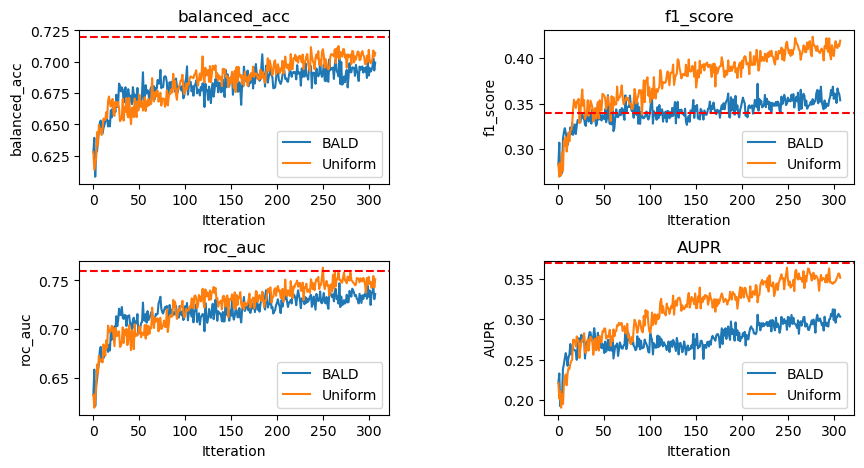

In [ ]:
BALD_mean = Results_BALD[Results_BALD.Tasks == "mean"]
uniform_mean = Results_Uniform[Results_Uniform.Tasks == "mean"]

# baseline
'''
data_dir = "/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/baseline_with_BERT/Results/"
model_name = f'val_metric_s42_alpha_{alpha}_gamma_{gamma}_loss_type_{loss_type}_λ{l2_lambda}.csv'
metric = pd.read_csv(data_dir + model_name)
mean = pd.DataFrame({"mean": metric.mean(numeric_only= True)}).T.reset_index()
mean = mean.rename(columns = {"index": "Tasks"})
baseline = pd.concat([metric,mean]).reset_index(drop = True)
baseline_mean = baseline[baseline.Tasks == "mean"]
'''
metrics_list = ["balanced_acc","f1_score","roc_auc", "average_precision"]
baseline_mean = [0.72, 0.34, 0.76, 0.37]
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,5),
                       gridspec_kw = {'wspace':0.5, 'hspace':0.5},
                       #sharey = 'col',
                       #sharex = True
                       )

ax = axs.ravel()
for i, metric in enumerate(metrics_list):
    sns.lineplot(data = BALD_mean, x = "Itteration", y = metric, label = "BALD", ax = ax[i])
    sns.lineplot(data = uniform_mean, x = "Itteration", y = metric, label = "Uniform", ax = ax[i])
    ax[i].axhline(y = baseline_mean[i], ls = '--', color = 'red')
    ax[i].set_title(metric)
plt.legend()
#fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/Performance_comparison_random_vs_BALD.png",
#            dpi = 300)

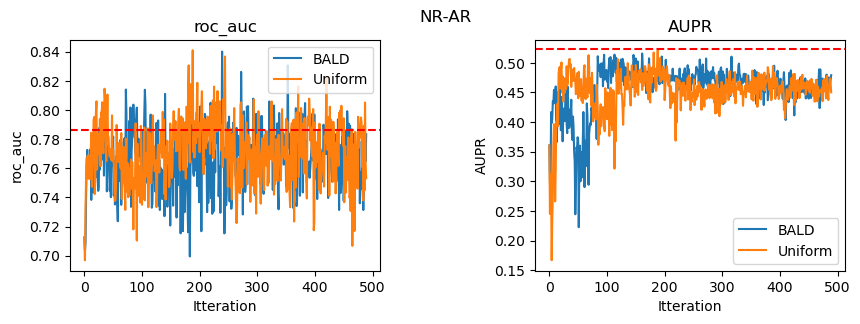

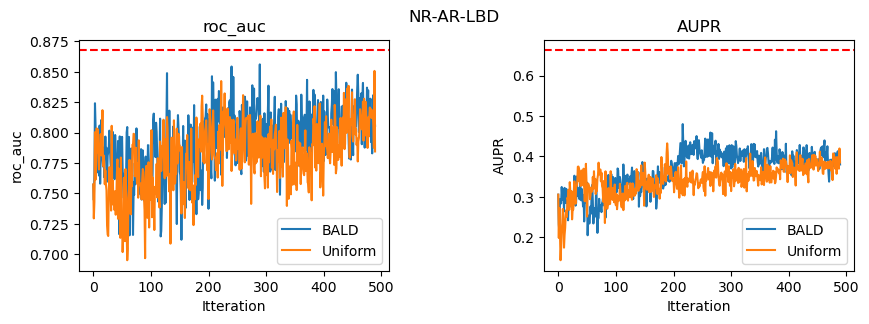

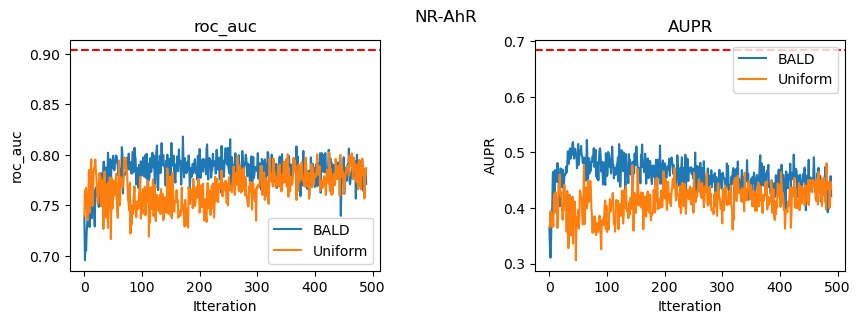

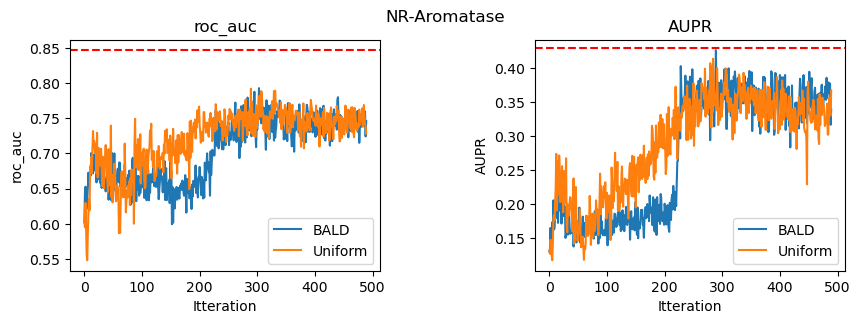

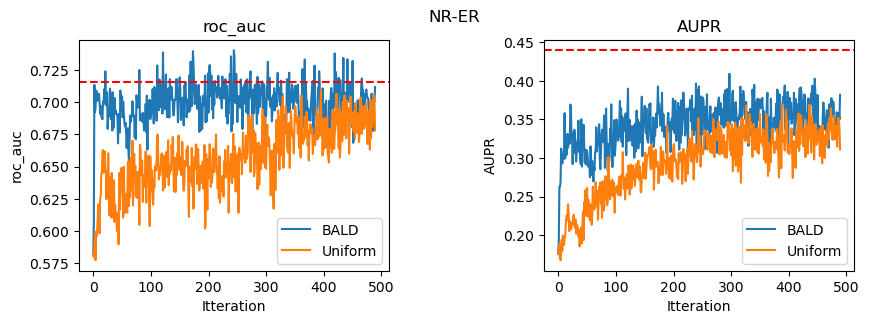

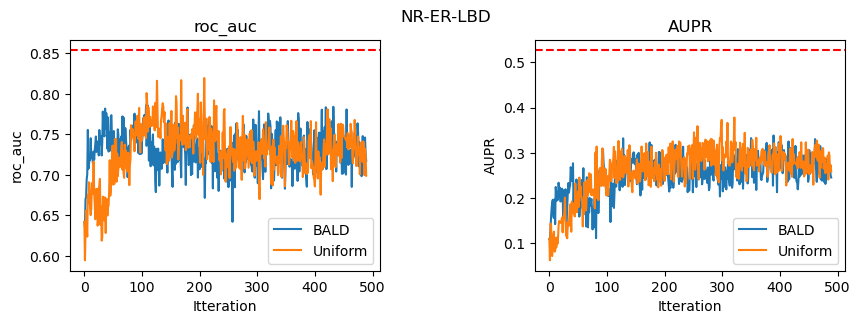

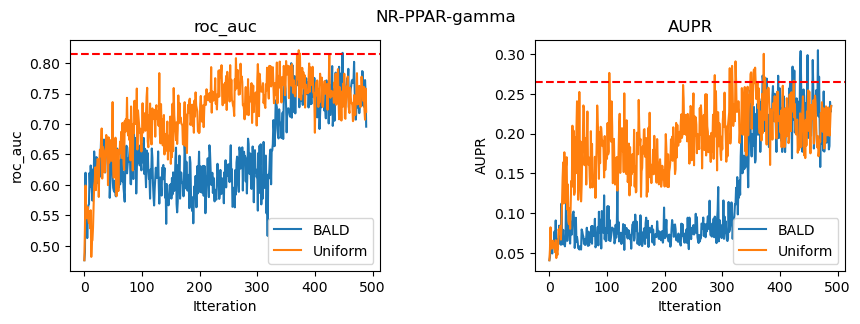

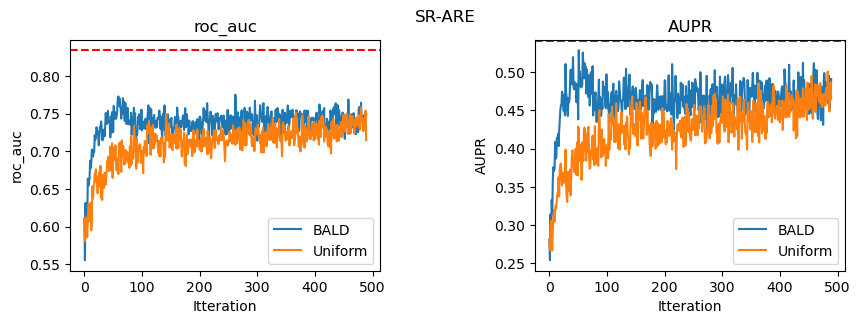

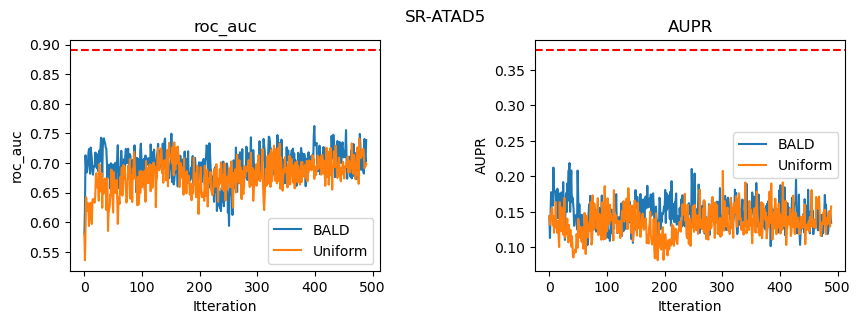

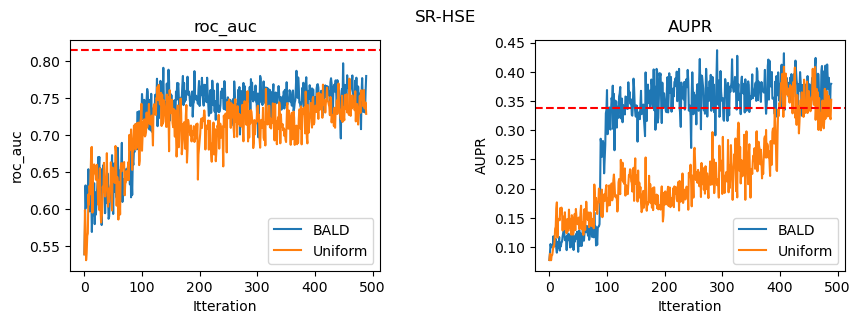

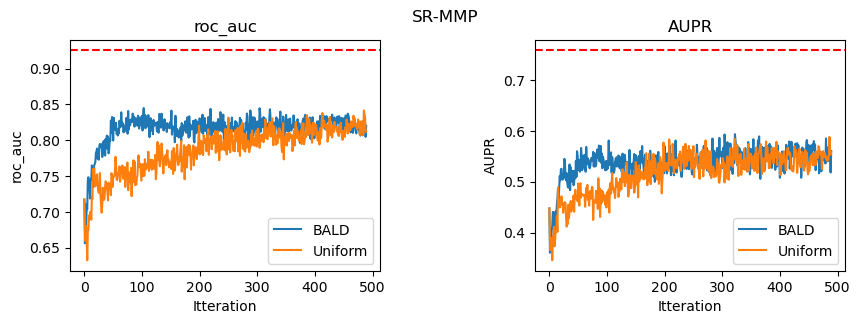

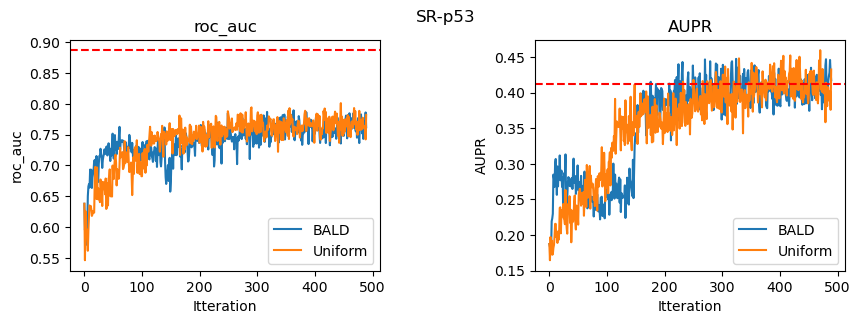

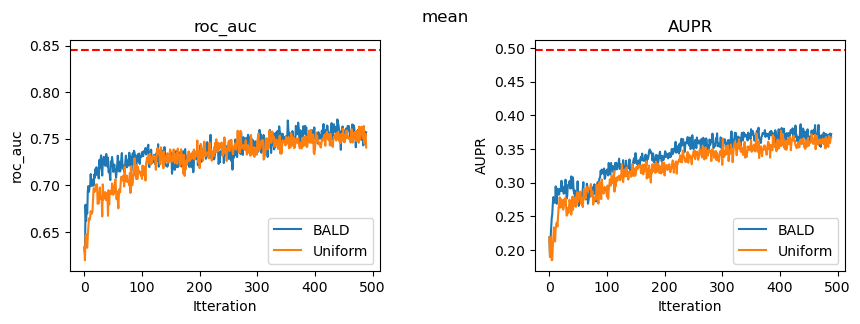

In [ ]:
for task in Results_BALD.Tasks.unique():
    BALD_mean = Results_BALD[Results_BALD.Tasks == task]
    uniform_mean = Results_Uniform[Results_Uniform.Tasks == task]

    baseline_task = baseline[baseline.Tasks == task]

    metrics_list = ["roc_auc", "average_precision"]

    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10,3),
                        gridspec_kw = {'wspace':0.5, 'hspace':0.5},
                        #sharey = 'col',
                        #sharex = True
                        )

    ax = axs.ravel()
    for i, metric in enumerate(metrics_list):
        sns.lineplot(data = BALD_mean, x = "Itteration", y = metric, label = "BALD", ax = ax[i])
        sns.lineplot(data = uniform_mean, x = "Itteration", y = metric, label = "Uniform", ax = ax[i])
        ax[i].axhline(y = baseline_task[metric].values, ls = '--', color = 'red')
        ax[i].set_title(metric)
    plt.suptitle(task)
    plt.legend()
    #fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/Performance_comparison_random_vs_BALD.png",
    #            dpi = 300)
    plt.show()

In [ ]:
import os
import pandas as pd
import numpy as np

import torch
import deepchem as dc
from pytorch_lightning import seed_everything

import wandb
os.environ["WANDB_SILENT"] = "true"
wandb.login(key = "27edf9c66b032c03f72d30e923276b93aa736429")

import torch.multiprocessing as mp
import gc
torch.multiprocessing.set_sharing_strategy('file_system')

from utils.data_utils import scafoldsplit_train_test, convert_to_dataframe
from utils.data_utils import convert_dataframe_to_dataloader

from utils.utils import wandb_init_model, compute_binary_classification_metrics_MT, active_learning_loop
from utils.model_utils import get_pred_with_uncertainities
from utils.data_utils import get_random_query_set, get_query_set, update_training_set, remove_queried_index_from_pool_set


# In[2]:


config = {
        # directories
        "project_name": "Tox21_BERT_BALD",
        "metadata_dir": '/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/BALD_sampling/',
        "target_file": "/projects/home/mmasood1/arslan_data_repository/Tox21/complete_Tox21.csv",
        "BERT_features_file":"/projects/home/mmasood1/arslan_data_repository/Tox21/Tox21_BERT_features.csv",
        "model_weights_dir" : '/projects/home/mmasood1/Model_weights/Tox21/',
        "pos_weights": "/projects/home/mmasood1/arslan_data_repository/Tox21/pos_weights.csv",
        "class_weights": "/projects/home/mmasood1/arslan_data_repository/Tox21/target_weights.csv",
        
        # data
        "features_type" :"FP",
        "FP_size" : 1024,
        "train_frac": 0.8,

        # architechture
        "input_dim": 768,
        "hidden_dim": 128,
        "depth" : 1,
        "dropout_p": 0.2,
        "BatchNorm1d": True,
        "use_skip_connection": True,
    
        # training
        "optim": 'Adam',#SGD
        "lr_schedulers": "CosineAnnealingLR",
        "lr": 1e-3,
        "l2_lambda": 0.0,
        "optm_l2_lambda": 1e-3,
        "epochs": 410,
        "compute_metric_after_n_epochs": 5,
        "batch_size": 64,
        "EarlyStopping": False, 
        "pretrained_model": False,
        
        # loss
        "missing" : 'nan',
        "alpha": 0.0,
        "beta": 0.0,
        "gamma":2.0,

        "gpu": [0],
        "accelerator": "gpu",
        "device" :torch.device("cuda"),
        "return_trainer": True, 
        "save_predicitons" : True,
        "Final_model": False,

        # active learning
        "num_forward_passes": 20,
        "num_itterations": 1000,
        "sampling_strategy": "BALD",
        "n_query":100
    }

# get targets information
data = pd.read_csv(config["target_file"])
target_names = data.loc[:, "NR-AR":"SR-p53"].columns.tolist()

config["num_of_tasks"] = len(target_names)
config["selected_tasks"] = target_names

config["loss_type"] = "Focal_loss" #"Focal_loss",# "BCE","Focal_loss_v2"
config["seed"] = 42


In [ ]:
train_set, test_set = scafoldsplit_train_test(config)

train_test_features (6264, 1024) (1567, 1024)
train_test_targets (6264, 1) (1567, 1)


In [ ]:
# Splitting by using deepchem
train_set, test_set = scafoldsplit_train_test(config)

randomstratifiedsplitter = dc.splits.RandomStratifiedSplitter()
pool_set, val_set, initial_set = randomstratifiedsplitter.train_valid_test_split(train_set,
                                                                                 frac_train=0.85,
                                                                                 frac_valid=0.134,
                                                                                 frac_test=0.016,
                                                                                 seed=42)

print("train_set", sorted(np.nansum(train_set.y, axis=0)))
print("test_set", sorted(np.nansum(test_set.y, axis=0)))
print("pool_set", sorted(np.nansum(pool_set.y, axis=0)))
print("val_set", sorted(np.nansum(val_set.y, axis=0)))
print("initial_set", sorted(np.nansum(initial_set.y, axis=0)))
train_set.y.shape, test_set.y.shape, pool_set.y.shape, val_set.y.shape, initial_set.y.shape

train_test_features (6121, 768) (1531, 768)
train_test_targets (6121, 12) (1531, 12)
train_set [114.0, 183.0, 185.0, 203.0, 249.0, 249.0, 256.0, 280.0, 587.0, 640.0, 687.0, 687.0]
test_set [42.0, 47.0, 52.0, 55.0, 63.0, 88.0, 91.0, 139.0, 140.0, 177.0, 204.0, 218.0]
pool_set [99.0, 149.0, 153.0, 169.0, 212.0, 213.0, 219.0, 235.0, 500.0, 534.0, 585.0, 587.0]
val_set [13.0, 25.0, 29.0, 30.0, 30.0, 33.0, 37.0, 40.0, 79.0, 91.0, 93.0, 94.0]
initial_set [2.0, 3.0, 3.0, 4.0, 4.0, 5.0, 5.0, 7.0, 8.0, 8.0, 9.0, 13.0]


((6121, 12), (1531, 12), (5203, 12), (820, 12), (98, 12))

In [ ]:

# Who cares about deepchem data_object, trash it
initial_set = convert_to_dataframe(initial_set, config["selected_tasks"])
val_set = convert_to_dataframe(val_set, config["selected_tasks"])
pool_set = convert_to_dataframe(pool_set, config["selected_tasks"])
test_set = convert_to_dataframe(test_set, config["selected_tasks"])

max_num_of_mol = initial_set.shape[0] + pool_set.shape[0]
max_pos_count= initial_set.iloc[:,1:].sum().sum() + pool_set.iloc[:,1:].sum().sum() 

In [ ]:
training_set = initial_set.copy()
num_unique_compounds_BALD = [training_set.SMILES.nunique()]
num_positive_examples_BALD = [(training_set[config["selected_tasks"]] == 1).sum().sum()]
print(model)
for itteration in range(num_itterations):
    #query_set_itteration_491_s42_alpha_0.0_gamma_0.0_loss_type_BCE_λ0.001.csv
    query_set = pd.read_csv(result_dir + f"BALD_sampling/query_set/query_set_itteration_{itteration}_{model}")
    training_set = update_training_set(training_set, query_set)
    
    # How many unique compounds 
    num_unique_mol = training_set.SMILES.nunique()
    num_unique_compounds_BALD.append(num_unique_mol)

    num_pos = (training_set[config["selected_tasks"]] == 1).sum().sum()
    num_positive_examples_BALD.append(num_pos)

s42_alpha_0.0_gamma_2.0_loss_type_Focal_loss_λ0.001.csv


In [ ]:
#uniform
training_set = initial_set.copy()
num_unique_compounds_unifrom = [training_set.SMILES.nunique()]
num_positive_examples_uniform = [(training_set[config["selected_tasks"]] == 1).sum().sum()]


for itteration in range(num_itterations):
    query_set = pd.read_csv(result_dir + f"uniform_sampling/query_set/query_set_itteration_{itteration}_{model}")
    training_set = update_training_set(training_set, query_set)
    num_unique_mol = training_set.SMILES.nunique()
    num_unique_compounds_unifrom.append(num_unique_mol)

    num_pos = (training_set[config["selected_tasks"]] == 1).sum().sum()
    num_positive_examples_uniform.append(num_pos)

Text(0, 0.5, 'Pos_examples')

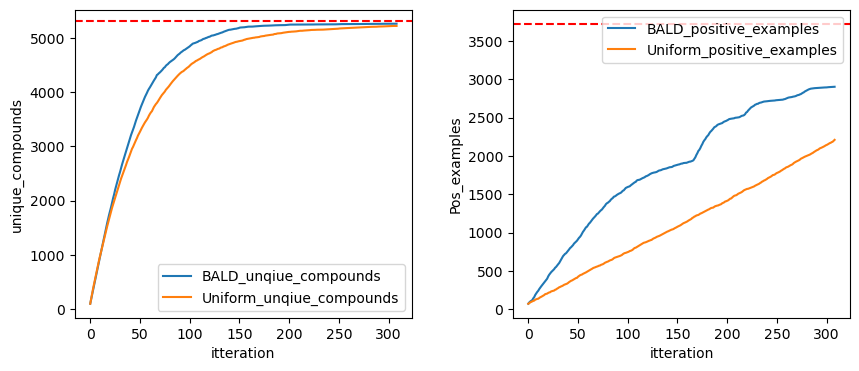

In [ ]:
sample_data = pd.DataFrame({"itteration": range(0,num_itterations+ 1),
              "Uniform_unqiue_compounds":num_unique_compounds_unifrom,
              "BALD_unqiue_compounds":num_unique_compounds_BALD,

              "Uniform_positive_examples":num_positive_examples_uniform,
              "BALD_positive_examples":num_positive_examples_BALD})

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4),
                       gridspec_kw = {'wspace':0.3, 'hspace':0.5},
                       #sharey = 'col',
                       #sharex = True
                       )
ax = axs.ravel()

sns.lineplot(data = sample_data, x = "itteration", y = "BALD_unqiue_compounds", label = "BALD_unqiue_compounds", ax = ax[0])
sns.lineplot(data = sample_data, x = "itteration", y = "Uniform_unqiue_compounds", label = "Uniform_unqiue_compounds", ax = ax[0])
ax[0].axhline(y = max_num_of_mol, ls = '--', color = 'red')
ax[0].set_ylabel("unique_compounds")

sns.lineplot(data = sample_data, x = "itteration", y = "BALD_positive_examples", label = "BALD_positive_examples", ax = ax[1])
sns.lineplot(data = sample_data, x = "itteration", y = "Uniform_positive_examples", label = "Uniform_positive_examples", ax = ax[1])
ax[1].axhline(y = max_pos_count, ls = '--', color = 'red')
ax[1].set_ylabel("Pos_examples")
#fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/efficiency_comparison_random_vs_BALD.png",
#            dpi = 300)

In [ ]:
#BALD v2
data_dir = "/projects/home/mmasood1/Active_learning_models_predictions/Tox21/Chemprop/v2/"
training_set = initial_set.copy()

num_unique_compounds_BALD_v2 = [training_set.SMILES.nunique()]
num_positive_examples_BALD_v2 = [(training_set[args.selected_tasks] == 1).sum().sum()]

for itteration in range(num_itterations):
    query_set = pd.read_csv(data_dir + f"BALD/query_setitteration_{itteration}_query_set.csv")
    training_set = update_training_set(training_set, query_set)
    
    # How many unique compounds 
    num_unique_mol = training_set.SMILES.nunique()
    num_unique_compounds_BALD_v2.append(num_unique_mol)

    num_pos = (training_set[args.selected_tasks] == 1).sum().sum()
    num_positive_examples_BALD_v2.append(num_pos)

In [ ]:
#BALD v3
data_dir = "/projects/home/mmasood1/Active_learning_models_predictions/Tox21/Chemprop/v3/"
training_set = initial_set.copy()

num_unique_compounds_BALD_v3 = [training_set.SMILES.nunique()]
num_positive_examples_BALD_v3 = [(training_set[args.selected_tasks] == 1).sum().sum()]

for itteration in range(num_itterations):
    query_set = pd.read_csv(data_dir + f"BALD/query_setitteration_{itteration}_query_set.csv")
    training_set = update_training_set(training_set, query_set)
    
    # How many unique compounds 
    num_unique_mol = training_set.SMILES.nunique()
    num_unique_compounds_BALD_v3.append(num_unique_mol)

    num_pos = (training_set[args.selected_tasks] == 1).sum().sum()
    num_positive_examples_BALD_v3.append(num_pos)

In [ ]:
#BALD v4
data_dir = "/projects/home/mmasood1/Active_learning_models_predictions/Tox21/Chemprop/v4/"
training_set = initial_set.copy()

num_unique_compounds_BALD_v4 = [training_set.SMILES.nunique()]
num_positive_examples_BALD_v4 = [(training_set[args.selected_tasks] == 1).sum().sum()]

for itteration in range(num_itterations):
    query_set = pd.read_csv(data_dir + f"BALD/query_setitteration_{itteration}_query_set.csv")
    training_set = update_training_set(training_set, query_set)
    
    # How many unique compounds 
    num_unique_mol = training_set.SMILES.nunique()
    num_unique_compounds_BALD_v4.append(num_unique_mol)

    num_pos = (training_set[args.selected_tasks] == 1).sum().sum()
    num_positive_examples_BALD_v4.append(num_pos)

In [ ]:
#uniform
training_set = initial_set.copy()

num_unique_compounds_unifrom = [training_set.SMILES.nunique()]
num_positive_examples_uniform = [(training_set[args.selected_tasks] == 1).sum().sum()]

for itteration in range(num_itterations):
    query_set = pd.read_csv(data_dir + f"uniform/query_setitteration_{itteration}_query_set.csv")
    training_set = update_training_set(training_set, query_set)

    num_unique_mol = training_set.SMILES.nunique()
    num_unique_compounds_unifrom.append(num_unique_mol)

    num_pos = (training_set[args.selected_tasks] == 1).sum().sum()
    num_positive_examples_uniform.append(num_pos)

Text(0, 0.5, 'Pos_examples')

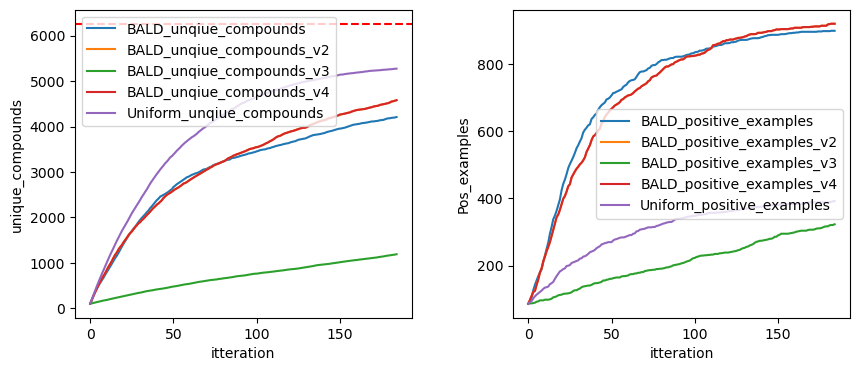

In [ ]:
sample_data = pd.DataFrame({"itteration": range(0,num_itterations+ 1),
              "Uniform_unqiue_compounds":num_unique_compounds_unifrom,
              "BALD_unqiue_compounds":num_unique_compounds_BALD,
              "BALD_unqiue_compounds_v2":num_unique_compounds_BALD_v2,
              "BALD_unqiue_compounds_v3":num_unique_compounds_BALD_v3,
              "BALD_unqiue_compounds_v4":num_unique_compounds_BALD_v4,

              "Uniform_positive_examples":num_positive_examples_uniform,
              "BALD_positive_examples":num_positive_examples_BALD,
              "BALD_positive_examples_v2":num_positive_examples_BALD_v2,
              "BALD_positive_examples_v3":num_positive_examples_BALD_v3,
              "BALD_positive_examples_v4":num_positive_examples_BALD_v4,})

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4),
                       gridspec_kw = {'wspace':0.3, 'hspace':0.5},
                       #sharey = 'col',
                       #sharex = True
                       )
ax = axs.ravel()

sns.lineplot(data = sample_data, x = "itteration", y = "BALD_unqiue_compounds", label = "BALD_unqiue_compounds", ax = ax[0])
sns.lineplot(data = sample_data, x = "itteration", y = "BALD_unqiue_compounds_v2", label = "BALD_unqiue_compounds_v2", ax = ax[0])
sns.lineplot(data = sample_data, x = "itteration", y = "BALD_unqiue_compounds_v3", label = "BALD_unqiue_compounds_v3", ax = ax[0])
sns.lineplot(data = sample_data, x = "itteration", y = "BALD_unqiue_compounds_v4", label = "BALD_unqiue_compounds_v4", ax = ax[0])

sns.lineplot(data = sample_data, x = "itteration", y = "Uniform_unqiue_compounds", label = "Uniform_unqiue_compounds", ax = ax[0])
ax[0].axhline(y = train_set.y.shape[0], ls = '--', color = 'red')
ax[0].set_ylabel("unique_compounds")

sns.lineplot(data = sample_data, x = "itteration", y = "BALD_positive_examples", label = "BALD_positive_examples", ax = ax[1])
sns.lineplot(data = sample_data, x = "itteration", y = "BALD_positive_examples_v2", label = "BALD_positive_examples_v2", ax = ax[1])
sns.lineplot(data = sample_data, x = "itteration", y = "BALD_positive_examples_v3", label = "BALD_positive_examples_v3", ax = ax[1])
sns.lineplot(data = sample_data, x = "itteration", y = "BALD_positive_examples_v4", label = "BALD_positive_examples_v4", ax = ax[1])


sns.lineplot(data = sample_data, x = "itteration", y = "Uniform_positive_examples", label = "Uniform_positive_examples", ax = ax[1])
ax[1].set_ylabel("Pos_examples")
#fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/efficiency_comparison_random_vs_BALD.png",
#            dpi = 300)

In [ ]:
# Single Tasks Exp
result_dir = "/projects/home/mmasood1/Active_learning_models_predictions/Tox21/Chemprop/Single_Task/"
num_itterations = 40

In [ ]:
NR_AR_NR_AR_LBD = pd.DataFrame()
NR_AR_NR_ER = pd.DataFrame()
NR_AR_NR_Aromatase = pd.DataFrame()

for itteration in range(num_itterations):
    AR_LBD = pd.read_csv(result_dir + f"NR-AR_NR-AR-LBD/itteration_{itteration}_metrics.csv")
    NR_ER = pd.read_csv(result_dir + f"NR-AR_NR-ER/itteration_{itteration}_metrics.csv")
    NR_Aromatase = pd.read_csv(result_dir + f"NR-AR_NR-Aromatase/itteration_{itteration}_metrics.csv")

    AR_LBD.insert(0, "Itteration", itteration)
    NR_ER.insert(0, "Itteration", itteration)
    NR_Aromatase.insert(0, "Itteration", itteration)

    NR_AR_NR_AR_LBD = pd.concat([NR_AR_NR_AR_LBD, AR_LBD])
    NR_AR_NR_ER = pd.concat([NR_AR_NR_ER, NR_ER])
    NR_AR_NR_Aromatase = pd.concat([NR_AR_NR_Aromatase, NR_Aromatase])

NR_AR_NR_AR_LBD.reset_index(drop = True, inplace = True)
NR_AR_NR_ER.reset_index(drop = True, inplace = True)
NR_AR_NR_Aromatase.reset_index(drop = True, inplace = True)

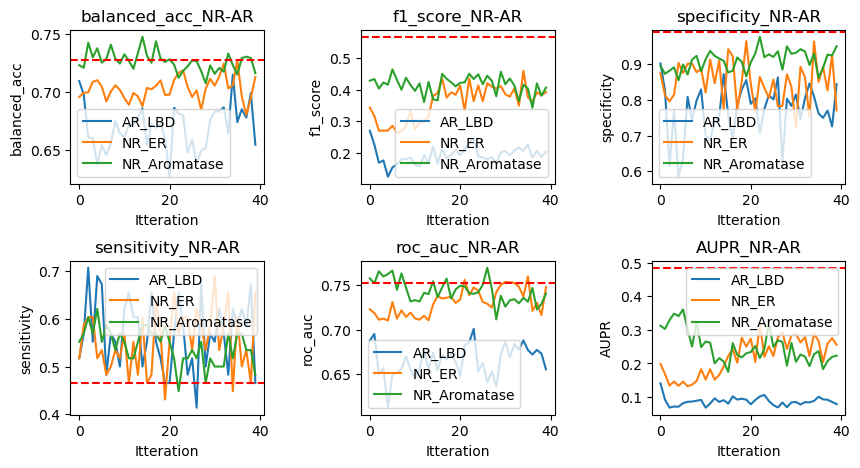

In [ ]:
AR_LBD = NR_AR_NR_AR_LBD[NR_AR_NR_AR_LBD.Tasks == "NR-AR"]
NR_ER = NR_AR_NR_ER[NR_AR_NR_ER.Tasks == "NR-AR"]
NR_Aromatase = NR_AR_NR_Aromatase[NR_AR_NR_Aromatase.Tasks == "NR-AR"]


baseline = pd.read_csv("/projects/home/mmasood1/trained_model_predictions/Tox21/Chemprop/Results/test_metrics.csv")
baseline = baseline[baseline.Tasks == "NR-AR"]

metrics_list = ["balanced_acc","f1_score","specificity", "sensitivity", "roc_auc", "average_precision"]

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (10,5),
                       gridspec_kw = {'wspace':0.5, 'hspace':0.5},
                       #sharey = 'col',
                       #sharex = True
                       )

ax = axs.ravel()
for i, metric in enumerate(metrics_list):
    sns.lineplot(data = AR_LBD, x = "Itteration", y = metric, label = "AR_LBD", ax = ax[i])
    sns.lineplot(data = NR_ER, x = "Itteration", y = metric, label = "NR_ER", ax = ax[i])
    sns.lineplot(data = NR_Aromatase, x = "Itteration", y = metric, label = "NR_Aromatase", ax = ax[i])

    ax[i].axhline(y = baseline[metric].values, ls = '--', color = 'red')
    ax[i].set_title(f"{metric}_NR-AR")
plt.legend()
#fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/Performance_comparison_random_vs_BALD.png",
#            dpi = 300)

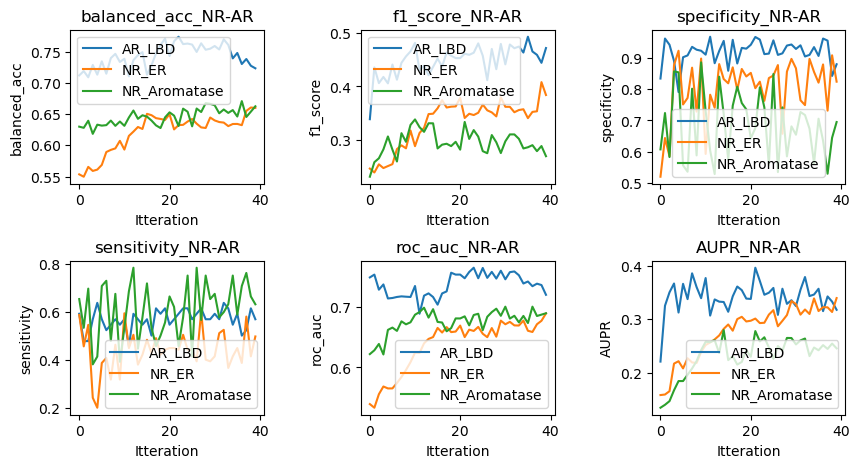

In [ ]:
AR_LBD = NR_AR_NR_AR_LBD[NR_AR_NR_AR_LBD.Tasks == "NR-AR-LBD"]
NR_ER = NR_AR_NR_ER[NR_AR_NR_ER.Tasks == "NR-ER"]
NR_Aromatase = NR_AR_NR_Aromatase[NR_AR_NR_Aromatase.Tasks == "NR-Aromatase"]

baseline = pd.read_csv("/projects/home/mmasood1/trained_model_predictions/Tox21/Chemprop/Results/test_metrics.csv")
baseline = baseline[baseline.Tasks == "NR-AR"]

metrics_list = ["balanced_acc","f1_score","specificity", "sensitivity", "roc_auc", "average_precision"]

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (10,5),
                       gridspec_kw = {'wspace':0.5, 'hspace':0.5},
                       #sharey = 'col',
                       #sharex = True
                       )
ax = axs.ravel()
for i, metric in enumerate(metrics_list):
    sns.lineplot(data = AR_LBD, x = "Itteration", y = metric, label = "AR_LBD", ax = ax[i])
    sns.lineplot(data = NR_ER, x = "Itteration", y = metric, label = "NR_ER", ax = ax[i])
    sns.lineplot(data = NR_Aromatase, x = "Itteration", y = metric, label = "NR_Aromatase", ax = ax[i])

    #ax[i].axhline(y = baseline[metric].values, ls = '--', color = 'red')
    ax[i].set_title(f"{metric}_NR-AR")
plt.legend()
#fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/Performance_comparison_random_vs_BALD.png",
#            dpi = 300)

In [ ]:
def count_molecules(main_task,task_dir):
    initial_set = pd.read_csv(result_dir + task_dir + "/query_set/initial_set.csv")
    training_set = initial_set.copy()

    num_unique_compounds = [training_set.SMILES.nunique()]
    num_positive_examples = [training_set[training_set[main_task[0]] == 1].shape[0]]

    for itteration in range(num_itterations):
        query_set = pd.read_csv(result_dir + task_dir + f"/query_set/itteration_{itteration}_query_set.csv")
        training_set = update_training_set(training_set, query_set)
        
        # How many unique compounds 
        num_unique_mol = training_set.SMILES.nunique()
        num_unique_compounds.append(num_unique_mol)

        num_pos = training_set[training_set[main_task[0]] == 1].shape[0]
        num_positive_examples.append(num_pos)
    return num_unique_compounds, num_positive_examples

In [ ]:
main_task = ["NR-AR"]
aux_task =  ["NR-AR-LBD"]
task_dir = main_task[0] +"_"+ aux_task[0]
num_unique_compounds_AR_LBD, num_positive_examples_AR_LBD = count_molecules(aux_task,task_dir)

In [ ]:
main_task = ["NR-AR"]
aux_task =  ["NR-ER"]
task_dir = main_task[0] +"_"+ aux_task[0]
num_unique_compounds_NR_ER, num_positive_examples_NR_ER = count_molecules(aux_task,task_dir)

In [ ]:
main_task = ["NR-AR"]
aux_task =  ["NR-Aromatase"]
task_dir = main_task[0] +"_"+ aux_task[0]
num_unique_compounds_NR_Aromatase, num_positive_examples_NR_Aromatase = count_molecules(aux_task,task_dir)

Text(0, 0.5, 'Pos_examples')

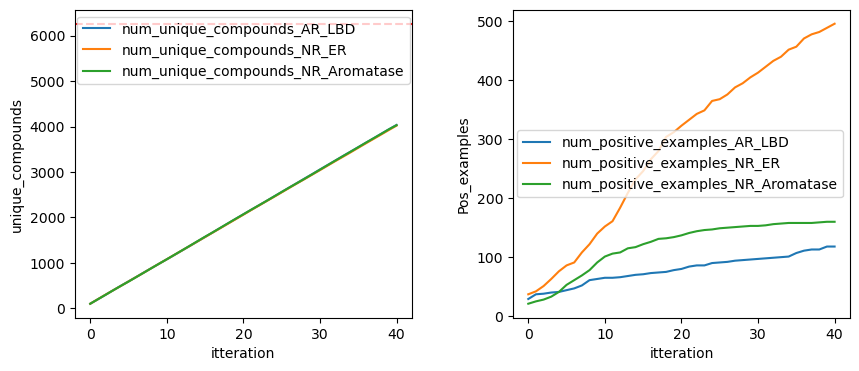

In [ ]:
sample_data = pd.DataFrame({"itteration": range(0,num_itterations+ 1),
              "num_unique_compounds_AR_LBD":num_unique_compounds_AR_LBD,
              "num_unique_compounds_NR_ER":num_unique_compounds_NR_ER,
              "num_unique_compounds_NR_Aromatase":num_unique_compounds_NR_Aromatase,

              "num_positive_examples_AR_LBD":num_positive_examples_AR_LBD,
              "num_positive_examples_NR_ER":num_positive_examples_NR_ER,
              "num_positive_examples_NR_Aromatase":num_positive_examples_NR_Aromatase,
              })

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4),
                       gridspec_kw = {'wspace':0.3, 'hspace':0.5},
                       #sharey = 'col',
                       #sharex = True
                       )
ax = axs.ravel()

sns.lineplot(data = sample_data, x = "itteration", y = "num_unique_compounds_AR_LBD", label = "num_unique_compounds_AR_LBD", ax = ax[0])
sns.lineplot(data = sample_data, x = "itteration", y = "num_unique_compounds_NR_ER", label = "num_unique_compounds_NR_ER", ax = ax[0])
sns.lineplot(data = sample_data, x = "itteration", y = "num_unique_compounds_NR_Aromatase", label = "num_unique_compounds_NR_Aromatase", ax = ax[0])
ax[0].axhline(y = train_set.y.shape[0], ls = '--', color = 'red')
ax[0].set_ylabel("unique_compounds")

sns.lineplot(data = sample_data, x = "itteration", y = "num_positive_examples_AR_LBD", label = "num_positive_examples_AR_LBD", ax = ax[1])
sns.lineplot(data = sample_data, x = "itteration", y = "num_positive_examples_NR_ER", label = "num_positive_examples_NR_ER", ax = ax[1])
sns.lineplot(data = sample_data, x = "itteration", y = "num_positive_examples_NR_Aromatase", label = "num_positive_examples_NR_Aromatase", ax = ax[1])

ax[1].set_ylabel("Pos_examples")
#fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/efficiency_comparison_random_vs_BALD.png",
#            dpi = 300)

In [ ]:

from utils.model_utils import pretrained_model, BALD_acquisition_function, get_top_indices, get_random_indices, get_top_indices_from_aux_task
from utils.model_utils import get_chemprop_pred, compute_binary_classification_metrics_MT


# In[2]:

TrainArgs.project_name = 'Tox21_BALD_ST'
TrainArgs.model_name = 'Trial'

TrainArgs.target_file = "/projects/home/mmasood1/arslan_data_repository/Tox21/complete_Tox21.csv"
TrainArgs.input_dim = 1024
TrainArgs.train_frac = 0.8

TrainArgs.pretrained_dir = "/projects/home/mmasood1/Model_weights/invitro/Chemprop/fold_0/fold_0/model_0/"
TrainArgs.model_weights_dir = "/projects/home/mmasood1/Model_weights/preclinical_clinical/chemprop/"
TrainArgs.metadata_dir = '/projects/home/mmasood1/Active_learning_models_predictions/Tox21/Chemprop/Single_Task/'
TrainArgs.pretrained_model = False

TrainArgs.depth = 3
TrainArgs.hidden_size = 300
TrainArgs.ffn_num_layers = 2
TrainArgs.ffn_hidden_size = 300
TrainArgs.num_of_tasks = None
TrainArgs.use_input_features = False
TrainArgs.dropout = 0.25
TrainArgs.batch_size = 50
TrainArgs.adding_bond_types = True
TrainArgs.atom_descriptors_size = 0

TrainArgs.scheduler_type = 'ReduceLROnPlateau'
TrainArgs.warmup_epochs = 2
TrainArgs.epochs = 100
TrainArgs.init_lr = 1e-4
TrainArgs.max_lr = 1e-3
TrainArgs.final_lr = 1e-4
TrainArgs.weight_decay = 0

TrainArgs.loss_function = "binary_cross_entropy"
TrainArgs.seed = 42

TrainArgs.accelerator = 'gpu'
TrainArgs.EarlyStopping = False
TrainArgs.return_trainer = True
TrainArgs.compute_metrics_during_training = True

TrainArgs.num_forward_passes = 20
TrainArgs.n_query = 100
TrainArgs.initial_set_size = 100
TrainArgs.num_itterations = 10000
TrainArgs.sampling_strategy = "BALD"
TrainArgs.seed = 42
TrainArgs.compute_metric_after_n_epochs = 5

args = TrainArgs
args.dataset_type = 'classification'
args.metric = 'auc'
args.is_atom_bond_targets = False
args.use_target_weights = False
args.missing_label_representation = 'nan'


# In[4]:


# get targets information
args.main_task = ["NR-AR"]
args.aux_task =  ["NR-Aromatase"]
target_names = args.main_task + args.aux_task
args.project_name = args.project_name +"_"+ args.main_task[0] +"_"+ args.aux_task[0]

args.num_of_tasks = len(target_names)
args.selected_tasks = target_names
args.num_of_tasks, args.selected_tasks
args.aux_task_number = 1
args.sample_only_from_aux_task = True


# In[5]:


np.random.seed(args.seed)
seed_everything(seed = args.seed)
train_set, test_set = scafoldsplit_train_test(target_file=args.target_file,
                                              selected_tasks=args.selected_tasks,
                                              FP_size=args.input_dim,
                                              train_frac=args.train_frac,)

np.random.seed(args.seed)
seed_everything(seed = args.seed)
train_set, test_set = scafoldsplit_train_test(target_file=args.target_file,
                                              selected_tasks=args.selected_tasks,
                                              FP_size=args.input_dim,
                                              train_frac=args.train_frac)

initial_set, train_set = get_initial_set_with_equal_ratio_of_active_inactive(train_set, args)

randomstratifiedsplitter = dc.splits.RandomStratifiedSplitter()
pool_set, val_set = randomstratifiedsplitter.train_test_split(train_set,
                                                            frac_train = 0.85,
                                                            seed = args.seed)

print("train_set",train_set.y.shape, sorted(np.nansum(train_set.y, axis=0)))
print("test_set",test_set.y.shape, sorted(np.nansum(test_set.y, axis=0)))
print("pool_set", pool_set.y.shape,sorted(np.nansum(pool_set.y, axis=0)))
print("val_set", val_set.y.shape,sorted(np.nansum(val_set.y, axis=0)))
print("initial_set", initial_set.y.shape,sorted(np.nansum(initial_set.y, axis=0)))

Seed set to 42
Seed set to 42


train_test_features (6264, 1024) (1567, 1024)
train_test_targets (6264, 2) (1567, 2)
train_test_features (6264, 1024) (1567, 1024)
train_test_targets (6264, 2) (1567, 2)
Number of active compounds: 30
Number of inactive compounds: 21
train_set (6164, 2) [187.0, 221.0]
test_set (1567, 2) [58.0, 92.0]
pool_set (5239, 2) [159.0, 189.0]
val_set (925, 2) [28.0, 32.0]
initial_set (100, 2) [21.0, 30.0]


In [ ]:
100 --> Main task (21 active / 79 inactive)
    --> Aux task (30 active / 70 inactive)

In [ ]:
Tox21 = pd.read_csv("/projects/home/mmasood1/arslan_data_repository/Tox21/complete_Tox21.csv")
Tox21.sum(axis = 0)

SMILES           CCOc1ccc2nc(S(N)(=O)=O)sc2c1CCN1C(=O)NC(c2cccc...
NR-AR                                                        309.0
NR-AR-LBD                                                    237.0
NR-AhR                                                       768.0
NR-Aromatase                                                 300.0
NR-ER                                                        793.0
NR-ER-LBD                                                    350.0
NR-PPAR-gamma                                                186.0
SR-ARE                                                       942.0
SR-ATAD5                                                     264.0
SR-HSE                                                       372.0
SR-MMP                                                       918.0
SR-p53                                                       423.0
dtype: object

# Bug Fix

In [ ]:
import warnings
import pandas as pd

# Filter out the specific warning
warnings.filterwarnings("ignore", message="In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences")

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from chemprop.args import TrainArgs
import deepchem as dc

from utils.data_utils import scafoldsplit_train_test, dataloader_for_numpy,convert_to_dataframe, convert_dataframe_to_dataloader
from utils.data_utils import get_query_set, update_training_set, remove_queried_index_from_pool_set

TrainArgs.target_file = "/projects/home/mmasood1/arslan_data_repository/Tox21/complete_Tox21.csv"
TrainArgs.input_dim = 1024
TrainArgs.train_frac = 0.8
TrainArgs.seed = 42
args = TrainArgs

# get targets information
data = pd.read_csv(args.target_file)
target_names = data.loc[:, "NR-AR":"SR-p53"].columns.tolist()

args.num_of_tasks = len(target_names)
args.selected_tasks = target_names
args.n_query = 1000

args.features_type = "FP"
args.FP_size = 1024

Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (/home/mmasood1/.conda/envs/env_arslan/lib/python3.9/site-packages/deepchem/models/torch_models/__init__.py)
Skipped loading some Jax models, missing a dependency. No module named 'jax'


In [ ]:
def get_random_query_set(dataset,args):
    np.random.seed(42)
    non_nan_indices = get_non_na_ind(dataset)
    if non_nan_indices.shape[0] > args.n_query:
        selected_set = np.random.choice(non_nan_indices.shape[0], size=args.n_query, replace=False)
        selected_mol_tasks = non_nan_indices[selected_set]
    else:
        selected_mol_tasks = non_nan_indices
    
    top_guns = pd.DataFrame()
    for mol_ind, task_ind in selected_mol_tasks:
        
        selected_sample = dataset[dataset.SMILES == mol_ind].loc[:, ["SMILES",task_ind]]
        top_guns = pd.concat([top_guns, selected_sample],axis=0)
    
    # Merge rows with SIMILAR SMILES
    top_guns = top_guns.groupby('SMILES').sum(min_count = 1).reset_index()
    return top_guns
   
def get_non_na_ind(dataset):
    dataset = dataset.reset_index(drop = True)
    if "SMILES" in dataset.columns:
        row_indices, col_indices = np.where(dataset.iloc[:,1:].notna().values)
        non_nan_indices = np.column_stack((dataset.SMILES[row_indices], dataset.columns[col_indices + 1]))
    else:
        "SMILES is not the first column, check me out"
    return non_nan_indices

def get_query_set(pool_set, top_indices):

    # get top guns
    selected_mol = pool_set.iloc[np.unique(top_indices[0]),0]

    # diffuse all others ~y_ik i.e replace with nan
    p_set = pool_set.iloc[:, 1:].copy(deep=True)
    mask = np.ones_like(p_set, dtype=bool)
    mask[top_indices] = False
    p_set[mask] = np.nan

    # pull our guys (y_ik)
    selected_tasks = p_set.iloc[np.unique(top_indices[0]), :]
    top_guns = pd.concat([selected_mol, selected_tasks], axis = 1).reset_index(drop = True)
    top_guns = top_guns.reset_index(drop = 2)
    return top_guns

def update_training_set(train_set, query_set):

    train_set = train_set.set_index("SMILES")
    query_set = query_set.set_index("SMILES")
    train_set = train_set.combine_first(query_set)
    train_set = train_set.reset_index()
    return train_set

def remove_queried_index_from_pool_set(pool_set, query_set, args):
    non_nan_indices = get_non_na_ind(query_set)
    updated_poolset = pool_set.copy(deep = True)

    # Replace observed values with nan
    for mol_ind, task_ind in non_nan_indices:
        updated_poolset.loc[updated_poolset['SMILES'] == mol_ind, task_ind] = np.nan
    
    # drop those rows whose all labels has be exhausted
    updated_poolset = updated_poolset.dropna(subset = args.selected_tasks, how = "all")

    return updated_poolset


In [ ]:
def active_learning_loop(initial_set, pool_set,query_set = None):
        
        if query_set is None:
            print("getting random query")
            query_set = get_random_query_set(pool_set, args)

        query_set = get_random_query_set(pool_set, args)
        updated_training = update_training_set(initial_set, query_set)
        updated_poolset = remove_queried_index_from_pool_set(pool_set, query_set, args)
        
        initial_counts = initial_set.iloc[:, 1:].count().sum()
        query_counts = query_set.iloc[:, 1:].count().sum()
        updated_training_counts = updated_training.iloc[:, 1:].count().sum()

        initial_poolset_counts = pool_set.iloc[:, 1:].count().sum()
        updated_poolset_counts = updated_poolset.iloc[:, 1:].count().sum()

        print(
                "initial_counts", initial_counts, 
                "initial_poolset_count", initial_poolset_counts, 
                "query_counts", query_counts, 
                "updated_training_counts", updated_training_counts, 
                "updated_poolset_counts", updated_poolset_counts)
        
        # Use an assertion to check if the counts are equal
        assert updated_training_counts == initial_counts + query_counts, "Training_count,Queryset counts are not equal"
        assert updated_poolset_counts == initial_poolset_counts - query_counts, "Poolset, Queryset count are not equal"
        
        return query_set, updated_poolset, updated_training

#assert updated_training_counts.equals(initial_counts + query_counts), "Training_count,Queryset counts are not equal"
#assert initial_poolset_counts.equals(updated_poolset_counts + query_counts), "Poolset, Queryset count are not equal"

#del initial_set,pool_set
#initial_set = updated_training.copy()
#pool_set = updated_poolset.copy()

In [ ]:
np.random.seed(args.seed)
train_set, test_set = scafoldsplit_train_test(args)

randomstratifiedsplitter = dc.splits.RandomStratifiedSplitter()
pool_set, val_set, initial_set = randomstratifiedsplitter.train_valid_test_split(train_set,
                                                                                 frac_train=0.85,
                                                                                 frac_valid=0.134,
                                                                                 frac_test=0.016,
                                                                                 seed=42)

print("train_set", sorted(np.nansum(train_set.y, axis=0)))
print("test_set", sorted(np.nansum(test_set.y, axis=0)))
print("pool_set", sorted(np.nansum(pool_set.y, axis=0)))
print("val_set", sorted(np.nansum(val_set.y, axis=0)))
print("initial_set", sorted(np.nansum(initial_set.y, axis=0)))
train_set.y.shape, test_set.y.shape, pool_set.y.shape, val_set.y.shape, initial_set.y.shape

# Who cares about deepchem data_object, trash it
initial_set = convert_to_dataframe(initial_set, args.selected_tasks)
val_set = convert_to_dataframe(val_set, args.selected_tasks)
pool_set = convert_to_dataframe(pool_set, args.selected_tasks)
test_set = convert_to_dataframe(test_set, args.selected_tasks)

max_num_of_mol = initial_set.shape[0] + pool_set.shape[0]
max_pos_count= initial_set.iloc[:,1:].sum().sum() + pool_set.iloc[:,1:].sum().sum() 
max_pos_count

train_test_features (6264, 1024) (1567, 1024)
train_test_targets (6264, 12) (1567, 12)
train_set [132.0, 193.0, 196.0, 208.0, 251.0, 276.0, 281.0, 300.0, 589.0, 648.0, 711.0, 718.0]
test_set [44.0, 50.0, 54.0, 58.0, 68.0, 91.0, 92.0, 145.0, 147.0, 179.0, 207.0, 224.0]
pool_set [109.0, 164.0, 164.0, 172.0, 219.0, 236.0, 236.0, 255.0, 499.0, 555.0, 602.0, 608.0]
val_set [18.0, 25.0, 25.0, 27.0, 31.0, 33.0, 38.0, 39.0, 81.0, 84.0, 94.0, 102.0]
initial_set [3.0, 4.0, 5.0, 5.0, 6.0, 7.0, 7.0, 9.0, 9.0, 9.0, 9.0, 14.0]


3906.0

In [ ]:
#uniform
from tqdm import tqdm
num_itterations = 70

num_unique_compounds_unifrom = [initial_set.SMILES.nunique()]
num_positive_examples_uniform = [(initial_set[args.selected_tasks] == 1).sum().sum()]

for iteration in tqdm(range(num_itterations)):
    query_set, updated_poolset, updated_training = active_learning_loop(initial_set, pool_set)

    
    del initial_set,pool_set
    initial_set = updated_training.copy()
    pool_set = updated_poolset.copy()

    num_unique_mol = initial_set.SMILES.nunique()
    num_unique_compounds_unifrom.append(num_unique_mol)

    num_pos = (initial_set[args.selected_tasks] == 1).sum().sum()
    num_positive_examples_uniform.append(num_pos)

    if pool_set.loc[:,args.selected_tasks].count().sum() <= 1:
        break

  1%|▏         | 1/70 [00:03<03:42,  3.23s/it]

initial_counts 1030 initial_poolset_count 54101 query_counts 1000 updated_training_counts 2030 updated_poolset_counts 53101


  3%|▎         | 2/70 [00:06<03:40,  3.24s/it]

initial_counts 2030 initial_poolset_count 53101 query_counts 1000 updated_training_counts 3030 updated_poolset_counts 52101


  4%|▍         | 3/70 [00:09<03:34,  3.20s/it]

initial_counts 3030 initial_poolset_count 52101 query_counts 1000 updated_training_counts 4030 updated_poolset_counts 51101


  6%|▌         | 4/70 [00:12<03:30,  3.19s/it]

initial_counts 4030 initial_poolset_count 51101 query_counts 1000 updated_training_counts 5030 updated_poolset_counts 50101


  7%|▋         | 5/70 [00:15<03:27,  3.19s/it]

initial_counts 5030 initial_poolset_count 50101 query_counts 1000 updated_training_counts 6030 updated_poolset_counts 49101


  9%|▊         | 6/70 [00:19<03:23,  3.18s/it]

initial_counts 6030 initial_poolset_count 49101 query_counts 1000 updated_training_counts 7030 updated_poolset_counts 48101


 10%|█         | 7/70 [00:22<03:19,  3.17s/it]

initial_counts 7030 initial_poolset_count 48101 query_counts 1000 updated_training_counts 8030 updated_poolset_counts 47101


 11%|█▏        | 8/70 [00:25<03:16,  3.17s/it]

initial_counts 8030 initial_poolset_count 47101 query_counts 1000 updated_training_counts 9030 updated_poolset_counts 46101


 13%|█▎        | 9/70 [00:28<03:14,  3.18s/it]

initial_counts 9030 initial_poolset_count 46101 query_counts 1000 updated_training_counts 10030 updated_poolset_counts 45101


 14%|█▍        | 10/70 [00:31<03:11,  3.19s/it]

initial_counts 10030 initial_poolset_count 45101 query_counts 1000 updated_training_counts 11030 updated_poolset_counts 44101


 16%|█▌        | 11/70 [00:35<03:07,  3.18s/it]

initial_counts 11030 initial_poolset_count 44101 query_counts 1000 updated_training_counts 12030 updated_poolset_counts 43101


 17%|█▋        | 12/70 [00:38<03:03,  3.17s/it]

initial_counts 12030 initial_poolset_count 43101 query_counts 1000 updated_training_counts 13030 updated_poolset_counts 42101


 19%|█▊        | 13/70 [00:41<03:00,  3.16s/it]

initial_counts 13030 initial_poolset_count 42101 query_counts 1000 updated_training_counts 14030 updated_poolset_counts 41101


 20%|██        | 14/70 [00:44<02:57,  3.16s/it]

initial_counts 14030 initial_poolset_count 41101 query_counts 1000 updated_training_counts 15030 updated_poolset_counts 40101


 21%|██▏       | 15/70 [00:47<02:53,  3.16s/it]

initial_counts 15030 initial_poolset_count 40101 query_counts 1000 updated_training_counts 16030 updated_poolset_counts 39101


 23%|██▎       | 16/70 [00:50<02:50,  3.16s/it]

initial_counts 16030 initial_poolset_count 39101 query_counts 1000 updated_training_counts 17030 updated_poolset_counts 38101


 24%|██▍       | 17/70 [00:53<02:47,  3.17s/it]

initial_counts 17030 initial_poolset_count 38101 query_counts 1000 updated_training_counts 18030 updated_poolset_counts 37101


 26%|██▌       | 18/70 [00:57<02:45,  3.18s/it]

initial_counts 18030 initial_poolset_count 37101 query_counts 1000 updated_training_counts 19030 updated_poolset_counts 36101


 27%|██▋       | 19/70 [01:00<02:42,  3.19s/it]

initial_counts 19030 initial_poolset_count 36101 query_counts 1000 updated_training_counts 20030 updated_poolset_counts 35101


 29%|██▊       | 20/70 [01:03<02:39,  3.19s/it]

initial_counts 20030 initial_poolset_count 35101 query_counts 1000 updated_training_counts 21030 updated_poolset_counts 34101


 30%|███       | 21/70 [01:06<02:37,  3.21s/it]

initial_counts 21030 initial_poolset_count 34101 query_counts 1000 updated_training_counts 22030 updated_poolset_counts 33101


 31%|███▏      | 22/70 [01:10<02:33,  3.20s/it]

initial_counts 22030 initial_poolset_count 33101 query_counts 1000 updated_training_counts 23030 updated_poolset_counts 32101


 33%|███▎      | 23/70 [01:13<02:30,  3.20s/it]

initial_counts 23030 initial_poolset_count 32101 query_counts 1000 updated_training_counts 24030 updated_poolset_counts 31101


 34%|███▍      | 24/70 [01:16<02:26,  3.19s/it]

initial_counts 24030 initial_poolset_count 31101 query_counts 1000 updated_training_counts 25030 updated_poolset_counts 30101


 36%|███▌      | 25/70 [01:19<02:23,  3.19s/it]

initial_counts 25030 initial_poolset_count 30101 query_counts 1000 updated_training_counts 26030 updated_poolset_counts 29101


 37%|███▋      | 26/70 [01:22<02:19,  3.18s/it]

initial_counts 26030 initial_poolset_count 29101 query_counts 1000 updated_training_counts 27030 updated_poolset_counts 28101


 39%|███▊      | 27/70 [01:25<02:16,  3.17s/it]

initial_counts 27030 initial_poolset_count 28101 query_counts 1000 updated_training_counts 28030 updated_poolset_counts 27101


 40%|████      | 28/70 [01:29<02:13,  3.17s/it]

initial_counts 28030 initial_poolset_count 27101 query_counts 1000 updated_training_counts 29030 updated_poolset_counts 26101


 41%|████▏     | 29/70 [01:32<02:09,  3.16s/it]

initial_counts 29030 initial_poolset_count 26101 query_counts 1000 updated_training_counts 30030 updated_poolset_counts 25101


 43%|████▎     | 30/70 [01:35<02:06,  3.16s/it]

initial_counts 30030 initial_poolset_count 25101 query_counts 1000 updated_training_counts 31030 updated_poolset_counts 24101


 44%|████▍     | 31/70 [01:38<02:03,  3.17s/it]

initial_counts 31030 initial_poolset_count 24101 query_counts 1000 updated_training_counts 32030 updated_poolset_counts 23101


 46%|████▌     | 32/70 [01:41<01:59,  3.15s/it]

initial_counts 32030 initial_poolset_count 23101 query_counts 1000 updated_training_counts 33030 updated_poolset_counts 22101


 47%|████▋     | 33/70 [01:44<01:56,  3.15s/it]

initial_counts 33030 initial_poolset_count 22101 query_counts 1000 updated_training_counts 34030 updated_poolset_counts 21101


 49%|████▊     | 34/70 [01:47<01:52,  3.13s/it]

initial_counts 34030 initial_poolset_count 21101 query_counts 1000 updated_training_counts 35030 updated_poolset_counts 20101


 50%|█████     | 35/70 [01:51<01:49,  3.12s/it]

initial_counts 35030 initial_poolset_count 20101 query_counts 1000 updated_training_counts 36030 updated_poolset_counts 19101


 51%|█████▏    | 36/70 [01:54<01:45,  3.11s/it]

initial_counts 36030 initial_poolset_count 19101 query_counts 1000 updated_training_counts 37030 updated_poolset_counts 18101


 53%|█████▎    | 37/70 [01:57<01:42,  3.11s/it]

initial_counts 37030 initial_poolset_count 18101 query_counts 1000 updated_training_counts 38030 updated_poolset_counts 17101


 54%|█████▍    | 38/70 [02:00<01:39,  3.11s/it]

initial_counts 38030 initial_poolset_count 17101 query_counts 1000 updated_training_counts 39030 updated_poolset_counts 16101


 56%|█████▌    | 39/70 [02:03<01:36,  3.10s/it]

initial_counts 39030 initial_poolset_count 16101 query_counts 1000 updated_training_counts 40030 updated_poolset_counts 15101


 57%|█████▋    | 40/70 [02:06<01:32,  3.09s/it]

initial_counts 40030 initial_poolset_count 15101 query_counts 1000 updated_training_counts 41030 updated_poolset_counts 14101


 59%|█████▊    | 41/70 [02:09<01:29,  3.09s/it]

initial_counts 41030 initial_poolset_count 14101 query_counts 1000 updated_training_counts 42030 updated_poolset_counts 13101


 60%|██████    | 42/70 [02:12<01:26,  3.08s/it]

initial_counts 42030 initial_poolset_count 13101 query_counts 1000 updated_training_counts 43030 updated_poolset_counts 12101


 61%|██████▏   | 43/70 [02:15<01:22,  3.07s/it]

initial_counts 43030 initial_poolset_count 12101 query_counts 1000 updated_training_counts 44030 updated_poolset_counts 11101


 63%|██████▎   | 44/70 [02:18<01:19,  3.06s/it]

initial_counts 44030 initial_poolset_count 11101 query_counts 1000 updated_training_counts 45030 updated_poolset_counts 10101


 64%|██████▍   | 45/70 [02:21<01:16,  3.05s/it]

initial_counts 45030 initial_poolset_count 10101 query_counts 1000 updated_training_counts 46030 updated_poolset_counts 9101


 66%|██████▌   | 46/70 [02:24<01:12,  3.04s/it]

initial_counts 46030 initial_poolset_count 9101 query_counts 1000 updated_training_counts 47030 updated_poolset_counts 8101


 67%|██████▋   | 47/70 [02:27<01:09,  3.02s/it]

initial_counts 47030 initial_poolset_count 8101 query_counts 1000 updated_training_counts 48030 updated_poolset_counts 7101


 69%|██████▊   | 48/70 [02:30<01:06,  3.01s/it]

initial_counts 48030 initial_poolset_count 7101 query_counts 1000 updated_training_counts 49030 updated_poolset_counts 6101


 70%|███████   | 49/70 [02:33<01:02,  2.98s/it]

initial_counts 49030 initial_poolset_count 6101 query_counts 1000 updated_training_counts 50030 updated_poolset_counts 5101


 71%|███████▏  | 50/70 [02:36<00:59,  2.95s/it]

initial_counts 50030 initial_poolset_count 5101 query_counts 1000 updated_training_counts 51030 updated_poolset_counts 4101


 73%|███████▎  | 51/70 [02:39<00:55,  2.92s/it]

initial_counts 51030 initial_poolset_count 4101 query_counts 1000 updated_training_counts 52030 updated_poolset_counts 3101


 74%|███████▍  | 52/70 [02:42<00:51,  2.87s/it]

initial_counts 52030 initial_poolset_count 3101 query_counts 1000 updated_training_counts 53030 updated_poolset_counts 2101


 76%|███████▌  | 53/70 [02:44<00:47,  2.81s/it]

initial_counts 53030 initial_poolset_count 2101 query_counts 1000 updated_training_counts 54030 updated_poolset_counts 1101


 77%|███████▋  | 54/70 [02:47<00:43,  2.74s/it]

initial_counts 54030 initial_poolset_count 1101 query_counts 1000 updated_training_counts 55030 updated_poolset_counts 101


 77%|███████▋  | 54/70 [02:47<00:49,  3.10s/it]

initial_counts 55030 initial_poolset_count 101 query_counts 101 updated_training_counts 55131 updated_poolset_counts 0


Text(0, 0.5, 'Pos_examples')

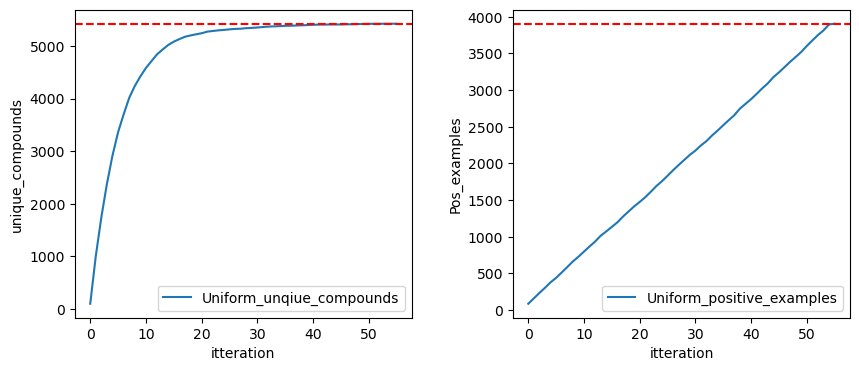

In [ ]:
#########################################################################3

sample_data = pd.DataFrame({"itteration": range(0,len(num_unique_compounds_unifrom)),
              "Uniform_unqiue_compounds":num_unique_compounds_unifrom,
              "Uniform_positive_examples":num_positive_examples_uniform,
              })

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4),
                       gridspec_kw = {'wspace':0.3, 'hspace':0.5},
                       #sharey = 'col',
                       #sharex = True
                       )
ax = axs.ravel()

sns.lineplot(data = sample_data, x = "itteration", y = "Uniform_unqiue_compounds", label = "Uniform_unqiue_compounds", ax = ax[0])
ax[0].axhline(y = max_num_of_mol, ls = '--', color = 'red')
ax[0].set_ylabel("unique_compounds")

sns.lineplot(data = sample_data, x = "itteration", y = "Uniform_positive_examples", label = "Uniform_positive_examples", ax = ax[1])
ax[1].axhline(y = max_pos_count, ls = '--', color = 'red')
ax[1].set_ylabel("Pos_examples")
#fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/efficiency_comparison_random_vs_BALD.png",
#            dpi = 300)

# How to resume if training breaks 

In [ ]:
from tqdm import tqdm

In [ ]:
np.random.seed(args.seed)
train_set, test_set = scafoldsplit_train_test(args)

randomstratifiedsplitter = dc.splits.RandomStratifiedSplitter()
pool_set, val_set, initial_set = randomstratifiedsplitter.train_valid_test_split(train_set,
                                                                                 frac_train=0.85,
                                                                                 frac_valid=0.134,
                                                                                 frac_test=0.016,
                                                                                 seed=42)

print("train_set", sorted(np.nansum(train_set.y, axis=0)))
print("test_set", sorted(np.nansum(test_set.y, axis=0)))
print("pool_set", sorted(np.nansum(pool_set.y, axis=0)))
print("val_set", sorted(np.nansum(val_set.y, axis=0)))
print("initial_set", sorted(np.nansum(initial_set.y, axis=0)))
train_set.y.shape, test_set.y.shape, pool_set.y.shape, val_set.y.shape, initial_set.y.shape

# Who cares about deepchem data_object, trash it
initial_set = convert_to_dataframe(initial_set, args.selected_tasks)
val_set = convert_to_dataframe(val_set, args.selected_tasks)
pool_set = convert_to_dataframe(pool_set, args.selected_tasks)
test_set = convert_to_dataframe(test_set, args.selected_tasks)

max_num_of_mol = initial_set.shape[0] + pool_set.shape[0]
max_pos_count= initial_set.iloc[:,1:].sum().sum() + pool_set.iloc[:,1:].sum().sum() 
print(initial_set.iloc[:,1:].notna().sum().sum())

train_test_features (6264, 1024) (1567, 1024)
train_test_targets (6264, 12) (1567, 12)
train_set [132.0, 193.0, 196.0, 208.0, 251.0, 276.0, 281.0, 300.0, 589.0, 648.0, 711.0, 718.0]
test_set [44.0, 50.0, 54.0, 58.0, 68.0, 91.0, 92.0, 145.0, 147.0, 179.0, 207.0, 224.0]
pool_set [109.0, 164.0, 164.0, 172.0, 219.0, 236.0, 236.0, 255.0, 499.0, 555.0, 602.0, 608.0]
val_set [18.0, 25.0, 25.0, 27.0, 31.0, 33.0, 38.0, 39.0, 81.0, 84.0, 94.0, 102.0]
initial_set [3.0, 4.0, 5.0, 5.0, 6.0, 7.0, 7.0, 9.0, 9.0, 9.0, 9.0, 14.0]
1030


In [ ]:
# Read query set
# Add query set to training set
# Remove qury set from pool set

In [ ]:
data_dir = "/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/uniform_sampling/query_set/"
model = "s42_alpha_0.0_gamma_0.0_loss_type_Focal_loss_λ0.001.csv"

In [ ]:
num_itterations = 10

for itteration in tqdm(range(num_itterations)):
    query_set = pd.read_csv(data_dir + f"query_set_itteration_{itteration}_"+ model)
    _, updated_poolset, updated_training = active_learning_loop(initial_set, pool_set, query_set)

    del initial_set,pool_set
    initial_set = updated_training.copy()
    pool_set = updated_poolset.copy()

 10%|█         | 1/10 [00:03<00:29,  3.24s/it]

initial_counts 1030 initial_poolset_count 54101 query_counts 1000 updated_training_counts 2030 updated_poolset_counts 53101


 20%|██        | 2/10 [00:06<00:25,  3.24s/it]

initial_counts 2030 initial_poolset_count 53101 query_counts 1000 updated_training_counts 3030 updated_poolset_counts 52101


 30%|███       | 3/10 [00:09<00:22,  3.23s/it]

initial_counts 3030 initial_poolset_count 52101 query_counts 1000 updated_training_counts 4030 updated_poolset_counts 51101


 40%|████      | 4/10 [00:12<00:19,  3.21s/it]

initial_counts 4030 initial_poolset_count 51101 query_counts 1000 updated_training_counts 5030 updated_poolset_counts 50101


 50%|█████     | 5/10 [00:16<00:15,  3.20s/it]

initial_counts 5030 initial_poolset_count 50101 query_counts 1000 updated_training_counts 6030 updated_poolset_counts 49101


 60%|██████    | 6/10 [00:19<00:12,  3.19s/it]

initial_counts 6030 initial_poolset_count 49101 query_counts 1000 updated_training_counts 7030 updated_poolset_counts 48101


 70%|███████   | 7/10 [00:22<00:09,  3.19s/it]

initial_counts 7030 initial_poolset_count 48101 query_counts 1000 updated_training_counts 8030 updated_poolset_counts 47101


 80%|████████  | 8/10 [00:25<00:06,  3.19s/it]

initial_counts 8030 initial_poolset_count 47101 query_counts 1000 updated_training_counts 9030 updated_poolset_counts 46101


 90%|█████████ | 9/10 [00:28<00:03,  3.18s/it]

initial_counts 9030 initial_poolset_count 46101 query_counts 1000 updated_training_counts 10030 updated_poolset_counts 45101


100%|██████████| 10/10 [00:31<00:00,  3.20s/it]

initial_counts 10030 initial_poolset_count 45101 query_counts 1000 updated_training_counts 11030 updated_poolset_counts 44101


# Result 1 Main Task remaining aux Task 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from utils.data_utils import update_training_set

Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (/home/mmasood1/.conda/envs/env_arslan/lib/python3.9/site-packages/deepchem/models/torch_models/__init__.py)
Skipped loading some Jax models, missing a dependency. No module named 'jax'


In [2]:
def get_results(model_dir, itteration):
    
    results_all = pd.DataFrame()
    for itteration in range(num_itterations):
        result_itteration = pd.read_csv(model_dir + f"/Results/itteration_{itteration}_metrics_itteration_{itteration}_s42_alpha_0.0_gamma_0.0_loss_type_BCE_λ0.001.csv")
        result_itteration.insert(0, "Itteration", itteration)
        results_all = pd.concat([results_all, result_itteration], axis = 0)
    return results_all

def get_sample_data(result_dir,selected_tasks,num_itterations):
    initial_set = pd.read_csv(result_dir + "/query_set/initial_set.csv")
    training_set = initial_set.copy()

    pos_cmp = pd.DataFrame()
    neg_cmp = pd.DataFrame()
    total_cmp = pd.DataFrame()

    for itteration in range(num_itterations):
        # positives
        pos_cmp_per_itteration = pd.DataFrame((training_set[selected_tasks] == 1).sum()).T
        pos_cmp_per_itteration.insert(0, "Itteration", itteration)
        pos_cmp = pd.concat([pos_cmp,pos_cmp_per_itteration], axis = 0)

        # negatives
        neg_cmp_per_itteration = pd.DataFrame((training_set[selected_tasks] == 0).sum()).T
        neg_cmp_per_itteration.insert(0, "Itteration", itteration)
        neg_cmp = pd.concat([neg_cmp,neg_cmp_per_itteration], axis = 0)

        # valid (pos + neg)
        total_cmp_per_itteration = pd.DataFrame(training_set[selected_tasks].notna().sum()).T
        total_cmp_per_itteration.insert(0, "Itteration", itteration)
        total_cmp = pd.concat([total_cmp,total_cmp_per_itteration], axis = 0)

        query_set = pd.read_csv(result_dir + f"/query_set/query_set_itteration_{itteration}_s42_alpha_0.0_gamma_0.0_loss_type_BCE_λ0.001.csv")
        training_set = update_training_set(training_set, query_set)

    pos_cmp = pd.melt(frame = pos_cmp, id_vars = "Itteration",var_name = "Task", value_name = "pos_samples") 
    neg_cmp = pd.melt(frame = neg_cmp, id_vars = "Itteration",var_name = "Task", value_name = "neg_samples") 
    total_cmp = pd.melt(frame = total_cmp, id_vars = "Itteration",var_name = "Task", value_name = "valid_samples") 
    sample_data = pd.merge(pd.merge(pos_cmp,neg_cmp,on=["Itteration","Task"]),
                            total_cmp,on=["Itteration","Task"])
    sample_data = sample_data.sort_values(by = "Itteration").reset_index(drop = True)
    return sample_data


In [3]:
def plot_results(main_task, aux_task):
    metrics_list = ["balanced_acc","f1_score","roc_auc", "average_precision"]
    baseline_main = main_task.head(1)
    fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,7),
                        gridspec_kw = {'wspace':0.5, 'hspace':0.5},
                        #sharey = 'col',
                        #sharex = True
                        )

    ax = axs.ravel()
    for i, metric in enumerate(metrics_list):
        sns.lineplot(data = main_task, x = "Itteration", y = metric, label = "main_task", ax = ax[i], color = 'Red')
        sns.lineplot(data = aux_task, x = "Itteration", y = metric, label = "Aux_task", ax = ax[i], color = 'Green')
        ax[i].axhline(y = baseline_main[metric].values, ls = '--', color = 'Red')
        ax[i].set_title(metric)
    plt.legend()
    return fig

def plot_samples_per_itteration(sample_data , use_hue_order = True, log_scale = True):
    # Your existing code to create subplots
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 3),
                            gridspec_kw={'wspace': 0.5, 'hspace': 0.5})

    palette = sns.color_palette("tab20", sample_data.Task.nunique())
    if use_hue_order:
        corelations = ['NR-AR',
                        'NR-AR-LBD',
                        'NR-ER',
                        'NR-ER-LBD',
                        'SR-ATAD5',
                        'SR-ARE',
                        'SR-MMP',
                        'SR-p53',
                        'NR-AhR',
                        'NR-Aromatase',
                        'NR-PPAR-gamma',
                        'SR-HSE']
    else:
        corelations = None
    # Your existing code for plotting on each subplot
    ax = axs.ravel()
    sns.lineplot(data=sample_data, x="Itteration", y="pos_samples", hue="Task", ax=ax[0], palette=palette, hue_order= corelations)
    sns.lineplot(data=sample_data, x="Itteration", y="neg_samples", hue="Task", ax=ax[1], palette=palette, hue_order= corelations)
    sns.lineplot(data=sample_data, x="Itteration", y="valid_samples", hue="Task", ax=ax[2], palette=palette, hue_order= corelations)

    # Your existing code to remove legends from individual subplots
    ax[0].get_legend().remove()
    ax[1].get_legend().remove()

    # Create a single legend for the entire plot
    handles, labels = ax[2].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=3)
    ax[2].get_legend().remove()


    # Set titles for subplots
    ax[0].set_title("Pos_samples")
    ax[1].set_title("Neg_samples")
    ax[2].set_title("Valid_samples")
    if log_scale:
        ax[0].set_yscale("log", base = 2)
        ax[1].set_yscale("log", base = 2)
        ax[2].set_yscale("log", base = 2)
    return fig

In [ ]:
config = {"target_file": "/projects/home/mmasood1/arslan_data_repository/Tox21/complete_Tox21.csv",
          "BALD_dir": "/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/Main_Aux_tasks_setting/1_main_remaining_aux/BALD/NR-AR",
          "EPIG_dir": "/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/Main_Aux_tasks_setting/1_main_remaining_aux/EPIG/NR-AR",
          "Uniform_dir":"/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/Main_Aux_tasks_setting/1_main_remaining_aux/Unfiorm/NR-AR"}

data = pd.read_csv(config["target_file"])     
all_tasks = data.loc[:, "NR-AR":"SR-p53"].columns.tolist()
config["main_task"] = ["NR-AR"]

config["aux_task"]  = all_tasks.copy()
config["aux_task"].remove(config["main_task"][0])

config["main_task_index"] = all_tasks.index(config["main_task"][0])
config["aux_task_index"] = [all_tasks.index(i) for i in config["aux_task"]]

target_names = config["main_task"] + config["aux_task"]
config["selected_tasks"] = target_names

In [ ]:
num_itterations = 473
results_BALD = get_results(config["BALD_dir"], num_itterations)
results_EPIG = get_results(config["EPIG_dir"], num_itterations)
results_Uniform = get_results(config["Uniform_dir"], num_itterations)

BALD_samples = get_sample_data(config["BALD_dir"],config["selected_tasks"], num_itterations)
EPIG_samples = get_sample_data(config["EPIG_dir"],config["selected_tasks"], num_itterations)
Uniform_samples = get_sample_data(config["Uniform_dir"],config["selected_tasks"], num_itterations)

/tmp/ipykernel_26257/692575606.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aux_task = results_BALD[~results_BALD.Tasks.isin(exclusion)].groupby("Itteration").mean().reset_index()


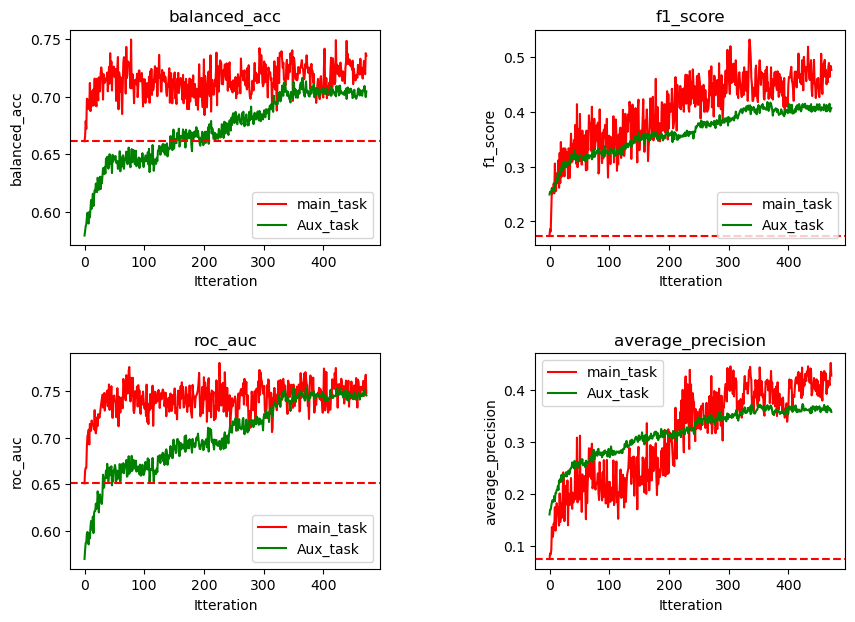

In [ ]:
main_task = results_BALD[results_BALD.Tasks == "NR-AR"]
exclusion = ["NR-AR","mean"]
aux_task = results_BALD[~results_BALD.Tasks.isin(exclusion)].groupby("Itteration").mean().reset_index()
fig = plot_results(main_task, aux_task)
#fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/Performance_comparison_random_vs_BALD.png",
#            dpi = 300)

/tmp/ipykernel_26257/2053749043.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aux_task = results_EPIG[~results_EPIG.Tasks.isin(exclusion)].groupby("Itteration").mean().reset_index()


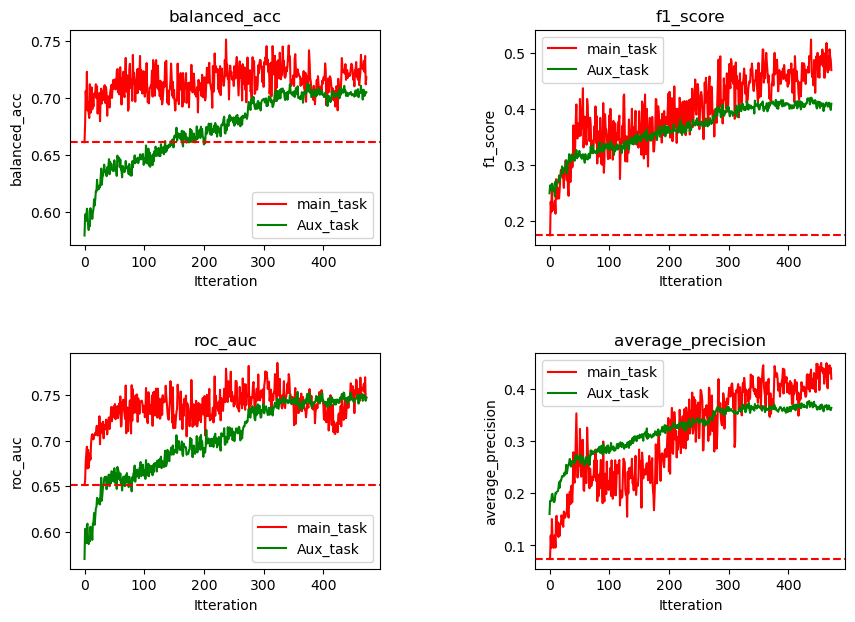

In [ ]:
main_task = results_EPIG[results_EPIG.Tasks == "NR-AR"]
exclusion = ["NR-AR","mean"]
aux_task = results_EPIG[~results_EPIG.Tasks.isin(exclusion)].groupby("Itteration").mean().reset_index()
fig = plot_results(main_task, aux_task)
#fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/Performance_comparison_random_vs_BALD.png",
#            dpi = 300)

/tmp/ipykernel_26257/2745442079.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aux_task = results_Uniform[~results_Uniform.Tasks.isin(exclusion)].groupby("Itteration").mean().reset_index()


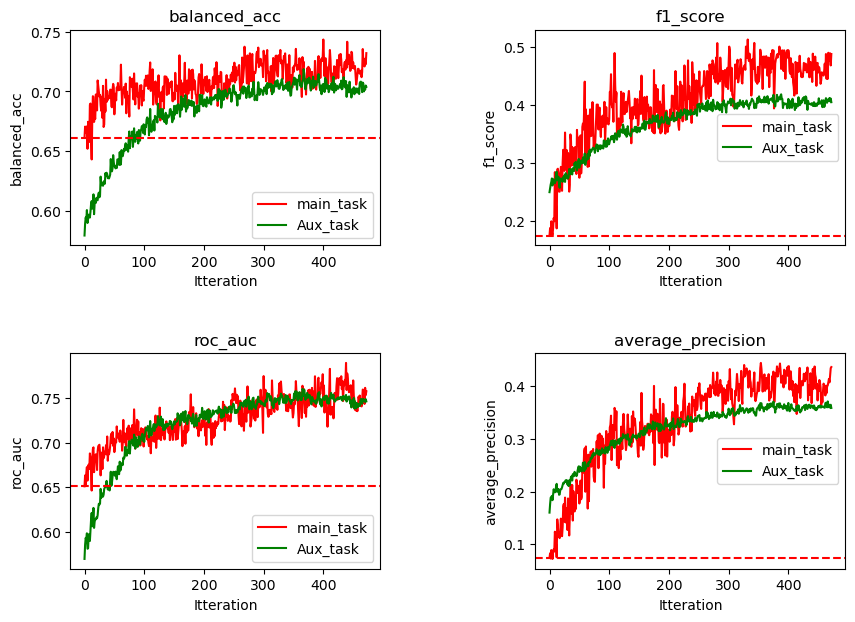

In [ ]:
main_task = results_Uniform[results_Uniform.Tasks == "NR-AR"]
exclusion = ["NR-AR","mean"]
aux_task = results_Uniform[~results_Uniform.Tasks.isin(exclusion)].groupby("Itteration").mean().reset_index()
fig = plot_results(main_task, aux_task)
#fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/Performance_comparison_random_vs_BALD.png",
#            dpi = 300)

# Samples acquired per task

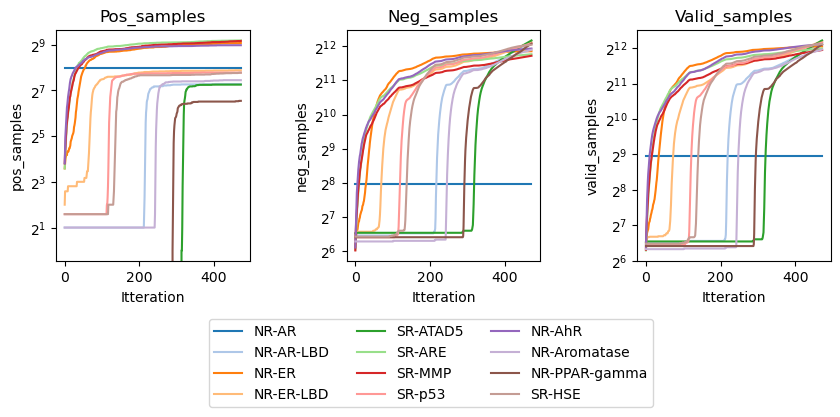

In [ ]:
fig = plot_samples_per_itteration(BALD_samples)



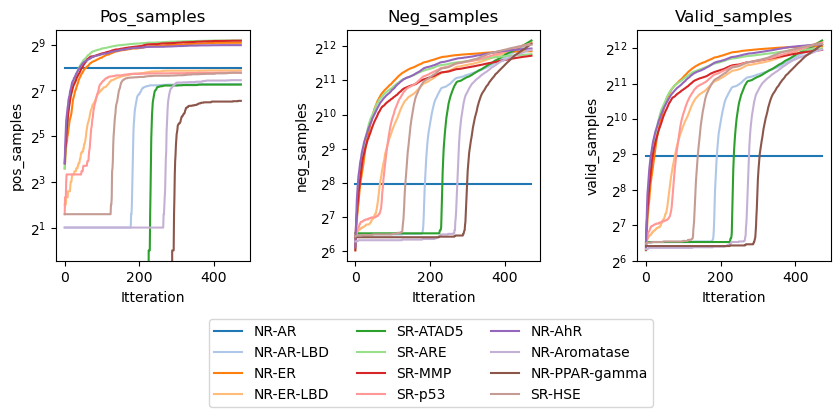

In [ ]:
fig = plot_samples_per_itteration(EPIG_samples)


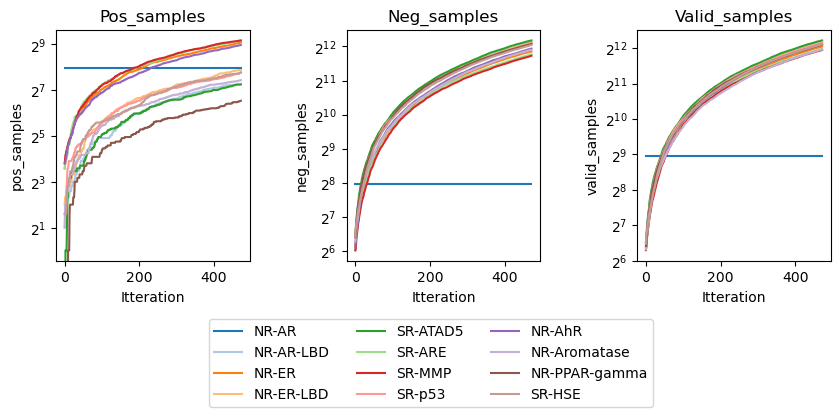

In [ ]:
fig = plot_samples_per_itteration(Uniform_samples)


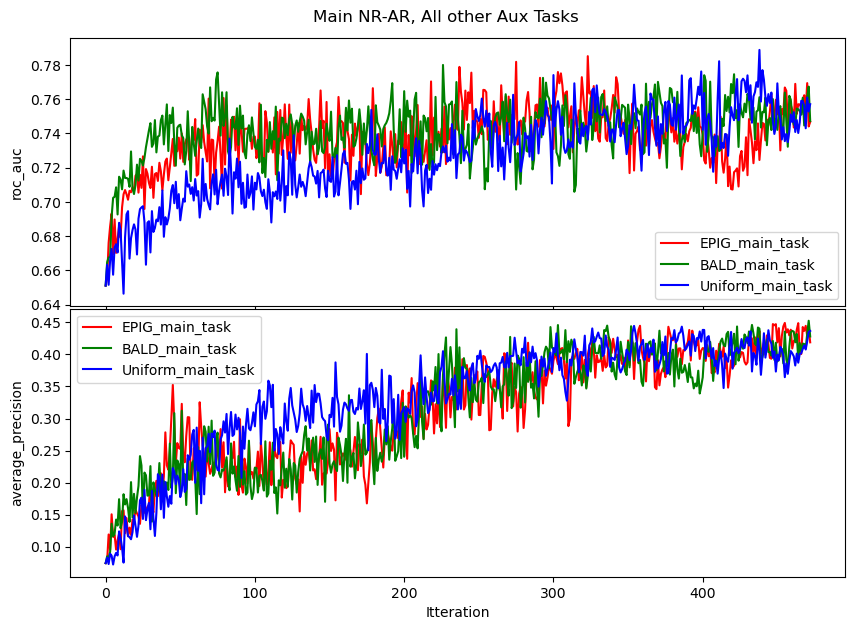

In [ ]:
itera = 473
EPIG_main_task = results_EPIG[results_EPIG.Tasks == "NR-AR"].head(itera)
BALD_main_task = results_BALD[results_BALD.Tasks == "NR-AR"].head(itera)
Uniform_main_task = results_Uniform[results_Uniform.Tasks == "NR-AR"].head(itera)

#metrics_list = ["balanced_acc","f1_score","roc_auc", "AUPR"]
metrics_list = ["roc_auc", "average_precision"]

baseline_main = main_task.head(1)
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (10,7),
                       gridspec_kw = {'wspace':0.5, 'hspace':0.01},
                       #sharey = 'col',
                       sharex = True
                       )

ax = axs.ravel()
for i, metric in enumerate(metrics_list):
    sns.lineplot(data = EPIG_main_task, x = "Itteration", y = metric, label = "EPIG_main_task", ax = ax[i], color = 'Red')
    sns.lineplot(data = BALD_main_task, x = "Itteration", y = metric, label = "BALD_main_task", ax = ax[i], color = 'Green')
    sns.lineplot(data = Uniform_main_task, x = "Itteration", y = metric, label = "Uniform_main_task", ax = ax[i], color = 'Blue')
    #ax[i].axhline(y = baseline_main[metric].values, ls = '--', color = 'Red')
    #ax[i].set_title(metric)
plt.legend()
fig.suptitle("Main NR-AR, All other Aux Tasks", y = 0.92)
fig.savefig(f"/projects/home/mmasood1/TG GATE/active_learning/figures/Main_NR_AR_all_aux/Performance_comparison_random_vs_BALD_EPIG_{itera}_itterations.png",
            dpi = 300)

# NR-AR main Task, all other aux task, n_query:1, initial_set balanced

In [4]:
config = {"target_file": "/projects/home/mmasood1/arslan_data_repository/Tox21/complete_Tox21.csv",
          "BALD_dir": "/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/Main_Aux_tasks_setting/1_main_remaining_aux/BALD_NR_AR_nquery_1/NR-AR",
          "EPIG_dir": "/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/Main_Aux_tasks_setting/1_main_remaining_aux/EPIG_NR_AR_nquery_1/NR-AR",
          "Uniform_dir":"/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/Main_Aux_tasks_setting/1_main_remaining_aux/Uniform_NR_AR_nquery_1/NR-AR"}

data = pd.read_csv(config["target_file"])     
all_tasks = data.loc[:, "NR-AR":"SR-p53"].columns.tolist()
config["main_task"] = ["NR-AR"]

config["aux_task"]  = all_tasks.copy()
config["aux_task"].remove(config["main_task"][0])

config["main_task_index"] = all_tasks.index(config["main_task"][0])
config["aux_task_index"] = [all_tasks.index(i) for i in config["aux_task"]]

target_names = config["main_task"] + config["aux_task"]
config["selected_tasks"] = target_names

In [7]:
num_itterations = 325
results_BALD = get_results(config["BALD_dir"], num_itterations)
results_EPIG = get_results(config["EPIG_dir"], num_itterations)
results_Uniform = get_results(config["Uniform_dir"], num_itterations)

BALD_samples = get_sample_data(config["BALD_dir"],config["selected_tasks"], num_itterations)
EPIG_samples = get_sample_data(config["EPIG_dir"],config["selected_tasks"], num_itterations)
Uniform_samples = get_sample_data(config["Uniform_dir"],config["selected_tasks"], num_itterations)

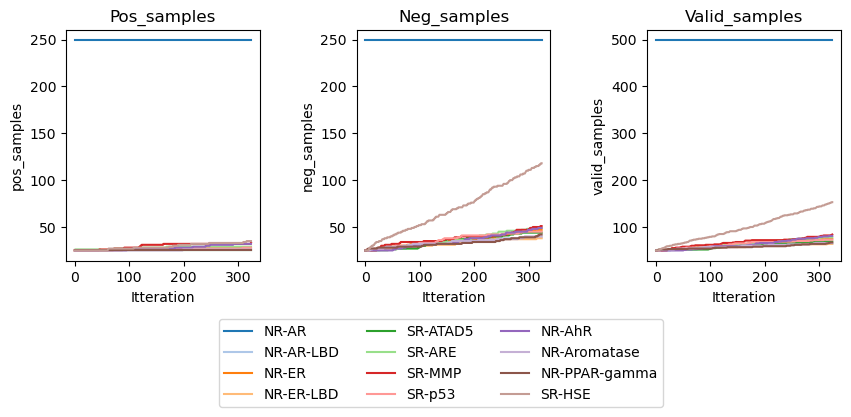

In [8]:
fig = plot_samples_per_itteration(BALD_samples, log_scale = False)


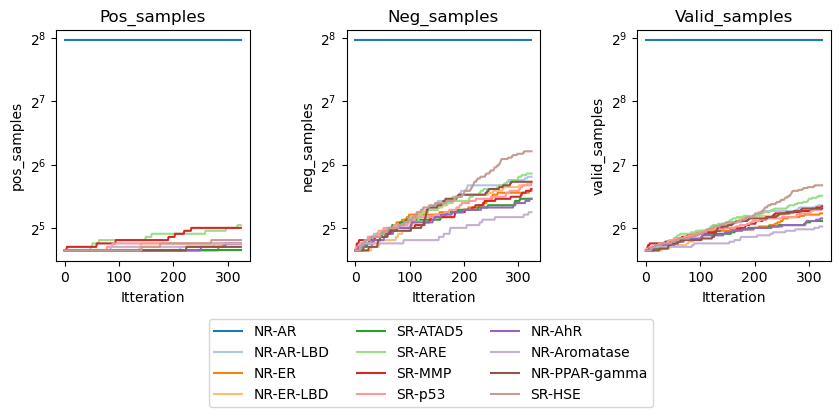

In [9]:
fig = plot_samples_per_itteration(EPIG_samples, log_scale = True)

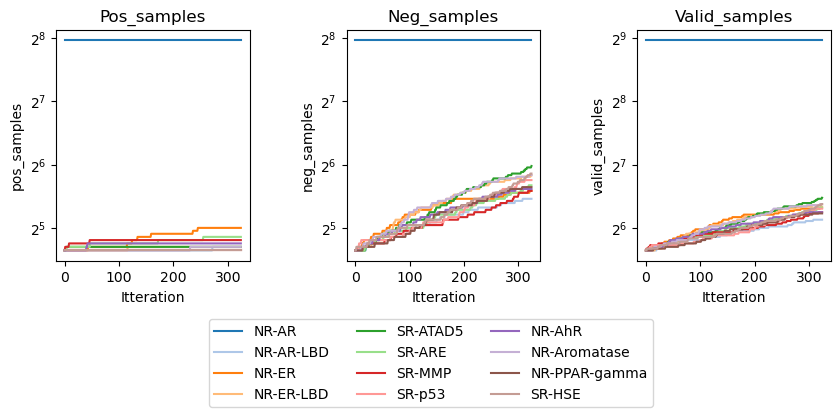

In [10]:
fig = plot_samples_per_itteration(Uniform_samples, log_scale = True)

/tmp/ipykernel_22762/1652850146.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aux_task = results_BALD[~results_BALD.Tasks.isin(exclusion)].groupby("Itteration").mean().reset_index()


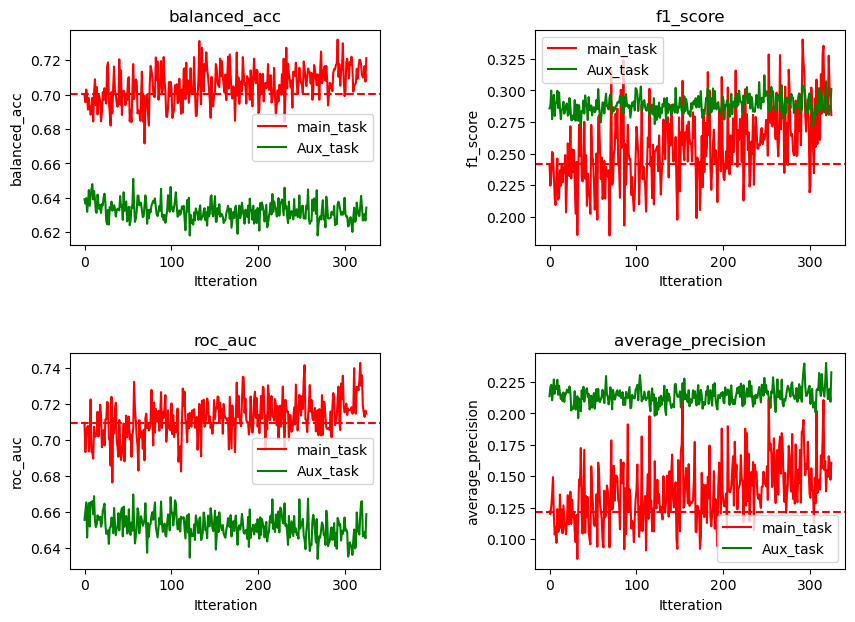

In [11]:
main_task = results_BALD[results_BALD.Tasks == config["main_task"][0]]
exclusion = [config["main_task"][0],"mean"]
aux_task = results_BALD[~results_BALD.Tasks.isin(exclusion)].groupby("Itteration").mean().reset_index()
fig = plot_results(main_task, aux_task)
#fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/Performance_comparison_random_vs_BALD.png",
#            dpi = 300)

/tmp/ipykernel_22762/1652850146.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aux_task = results_BALD[~results_BALD.Tasks.isin(exclusion)].groupby("Itteration").mean().reset_index()


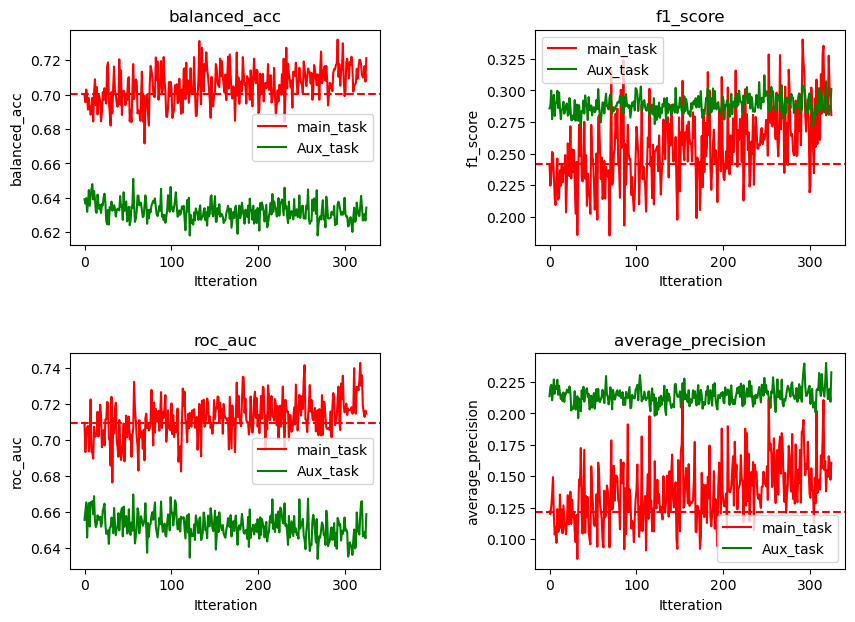

In [12]:
main_task = results_BALD[results_BALD.Tasks == config["main_task"][0]]
exclusion = [config["main_task"][0],"mean"]
aux_task = results_BALD[~results_BALD.Tasks.isin(exclusion)].groupby("Itteration").mean().reset_index()
fig = plot_results(main_task, aux_task)
#fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/Performance_comparison_random_vs_BALD.png",
#            dpi = 300)

/tmp/ipykernel_22762/3507108763.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aux_task = results_EPIG[~results_EPIG.Tasks.isin(exclusion)].groupby("Itteration").mean().reset_index()


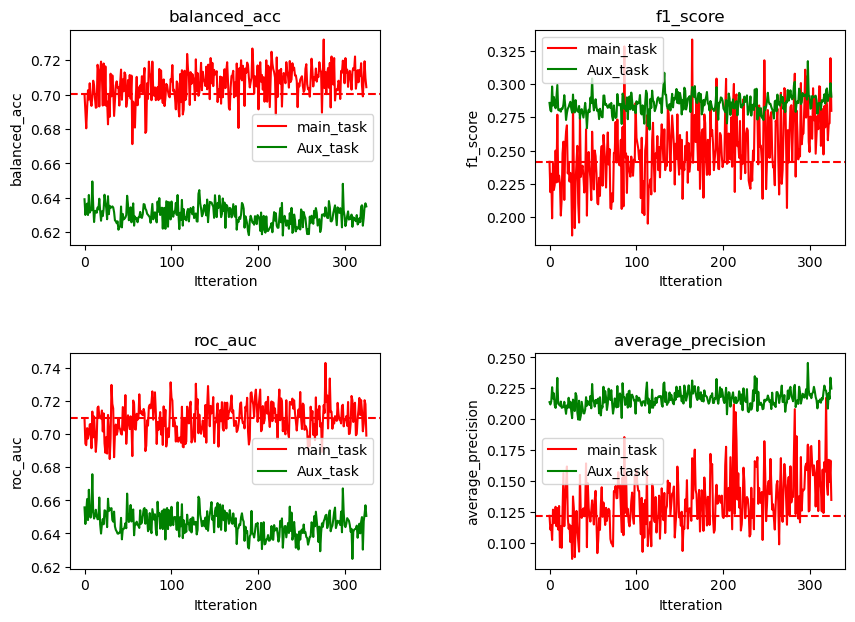

In [13]:
main_task = results_EPIG[results_EPIG.Tasks == config["main_task"][0]]
exclusion = [config["main_task"][0],"mean"]
aux_task = results_EPIG[~results_EPIG.Tasks.isin(exclusion)].groupby("Itteration").mean().reset_index()
fig = plot_results(main_task, aux_task)
#fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/Performance_comparison_random_vs_BALD.png",
#            dpi = 300)

/tmp/ipykernel_22762/414429730.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aux_task = results_Uniform[~results_Uniform.Tasks.isin(exclusion)].groupby("Itteration").mean().reset_index()


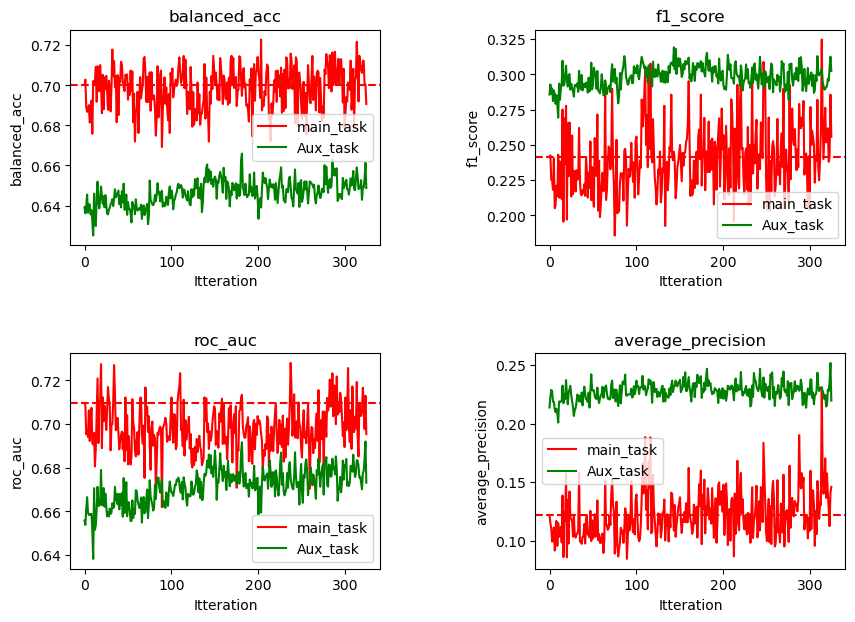

In [14]:
main_task = results_Uniform[results_Uniform.Tasks == config["main_task"][0]]
exclusion = [config["main_task"][0],"mean"]
aux_task = results_Uniform[~results_Uniform.Tasks.isin(exclusion)].groupby("Itteration").mean().reset_index()
fig = plot_results(main_task, aux_task)
#fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/Performance_comparison_random_vs_BALD.png",
#            dpi = 300)

Text(0.5, 0.92, 'Main NR-AR, All other Aux Tasks')

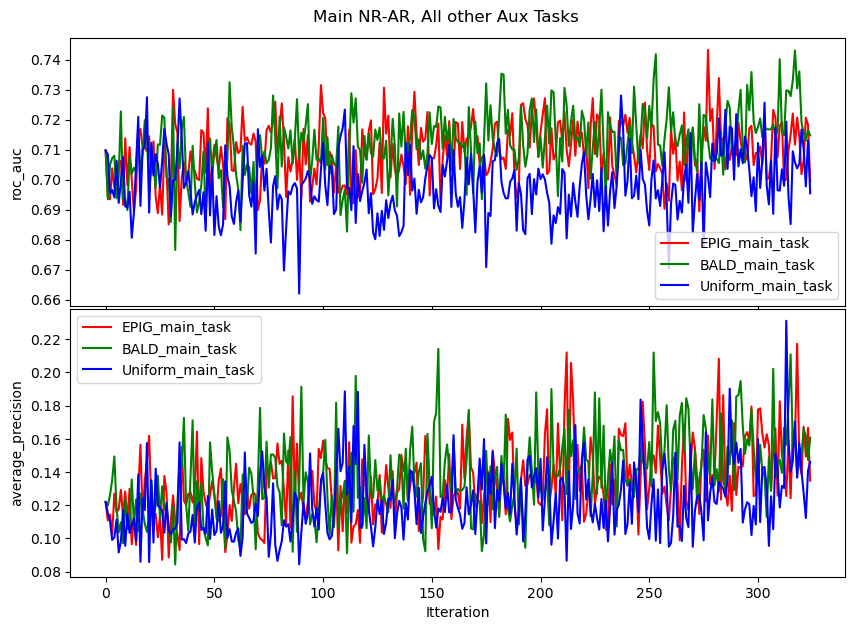

In [15]:
itera = num_itterations
EPIG_main_task = results_EPIG[results_EPIG.Tasks == "NR-AR"].head(itera)
BALD_main_task = results_BALD[results_BALD.Tasks == "NR-AR"].head(itera)
Uniform_main_task = results_Uniform[results_Uniform.Tasks == "NR-AR"].head(itera)

#metrics_list = ["balanced_acc","f1_score","roc_auc", "AUPR"]
metrics_list = ["roc_auc", "average_precision"]

baseline_main = main_task.head(1)
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (10,7),
                       gridspec_kw = {'wspace':0.5, 'hspace':0.01},
                       #sharey = 'col',
                       sharex = True
                       )

ax = axs.ravel()
for i, metric in enumerate(metrics_list):
    sns.lineplot(data = EPIG_main_task, x = "Itteration", y = metric, label = "EPIG_main_task", ax = ax[i], color = 'Red')
    sns.lineplot(data = BALD_main_task, x = "Itteration", y = metric, label = "BALD_main_task", ax = ax[i], color = 'Green')
    sns.lineplot(data = Uniform_main_task, x = "Itteration", y = metric, label = "Uniform_main_task", ax = ax[i], color = 'Blue')
    #ax[i].axhline(y = baseline_main[metric].values, ls = '--', color = 'Red')
    #ax[i].set_title(metric)
plt.legend()
fig.suptitle("Main NR-AR, All other Aux Tasks", y = 0.92)
#fig.savefig(f"/projects/home/mmasood1/TG GATE/active_learning/figures/Main_NR_AR_all_aux/Performance_comparison_random_vs_BALD_EPIG_{itera}_itterations.png",
#            dpi = 300)

# SR-ARE main Task, 4 Aux tasks

In [ ]:
config = {"target_file": "/projects/home/mmasood1/arslan_data_repository/Tox21/complete_Tox21.csv",
          "BALD_dir": "/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/Main_Aux_tasks_setting/1_main_remaining_aux/BALD/SR-ARE",
          "EPIG_dir": "/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/Main_Aux_tasks_setting/1_main_remaining_aux/EPIG/SR-ARE",
          "Uniform_dir":"/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/Main_Aux_tasks_setting/1_main_remaining_aux/Unfiorm/SR-ARE"}

config["main_task"] = ["SR-ARE"]
config["aux_task"] = ["SR-MMP","NR-ER","NR-AhR"]

target_names = config["main_task"] + config["aux_task"]
config["selected_tasks"] = target_names

In [ ]:
num_itterations = 122
results_BALD = get_results(config["BALD_dir"], num_itterations)
results_EPIG = get_results(config["EPIG_dir"], num_itterations)
results_Uniform = get_results(config["Uniform_dir"], num_itterations)

BALD_samples = get_sample_data(config["BALD_dir"],config["selected_tasks"], num_itterations)
EPIG_samples = get_sample_data(config["EPIG_dir"],config["selected_tasks"], num_itterations)
Uniform_samples = get_sample_data(config["Uniform_dir"],config["selected_tasks"], num_itterations)


/tmp/ipykernel_26257/1652850146.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aux_task = results_BALD[~results_BALD.Tasks.isin(exclusion)].groupby("Itteration").mean().reset_index()


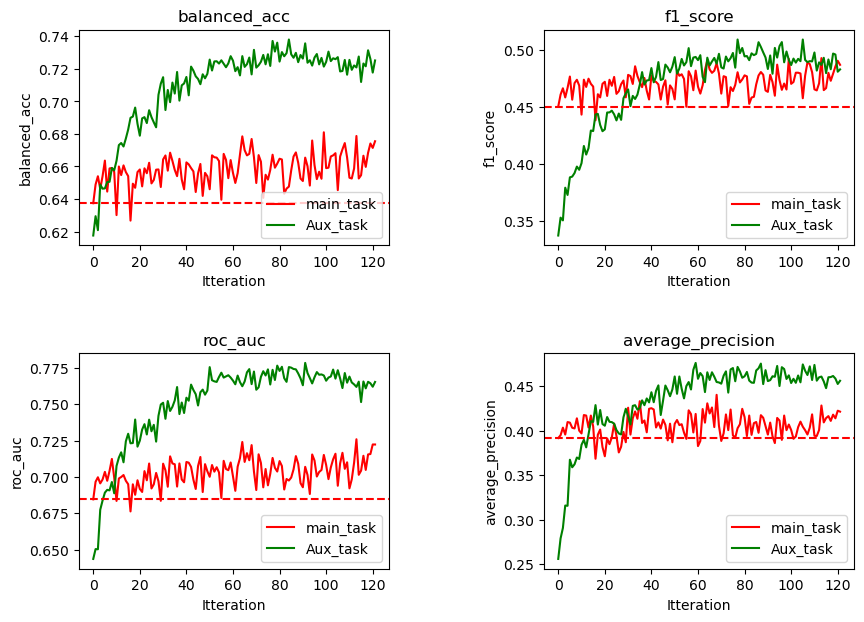

In [ ]:
main_task = results_BALD[results_BALD.Tasks == config["main_task"][0]]
exclusion = [config["main_task"][0],"mean"]
aux_task = results_BALD[~results_BALD.Tasks.isin(exclusion)].groupby("Itteration").mean().reset_index()
fig = plot_results(main_task, aux_task)
#fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/Performance_comparison_random_vs_BALD.png",
#            dpi = 300)

/tmp/ipykernel_26257/3507108763.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aux_task = results_EPIG[~results_EPIG.Tasks.isin(exclusion)].groupby("Itteration").mean().reset_index()


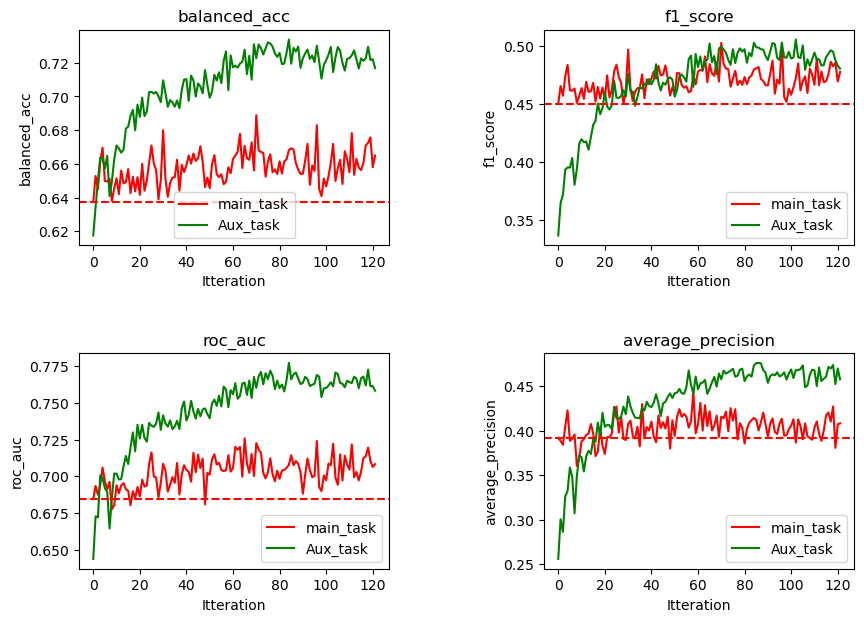

In [ ]:
main_task = results_EPIG[results_EPIG.Tasks == config["main_task"][0]]
exclusion = [config["main_task"][0],"mean"]
aux_task = results_EPIG[~results_EPIG.Tasks.isin(exclusion)].groupby("Itteration").mean().reset_index()
fig = plot_results(main_task, aux_task)
#fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/Performance_comparison_random_vs_BALD.png",
#            dpi = 300)

/tmp/ipykernel_26257/414429730.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aux_task = results_Uniform[~results_Uniform.Tasks.isin(exclusion)].groupby("Itteration").mean().reset_index()


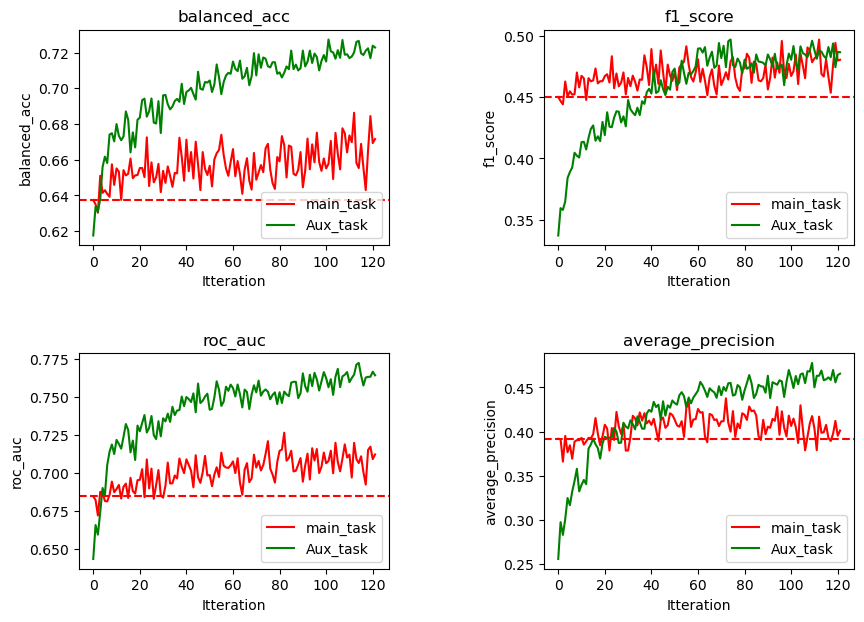

In [ ]:
main_task = results_Uniform[results_Uniform.Tasks == config["main_task"][0]]
exclusion = [config["main_task"][0],"mean"]
aux_task = results_Uniform[~results_Uniform.Tasks.isin(exclusion)].groupby("Itteration").mean().reset_index()
fig = plot_results(main_task, aux_task)
#fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/Performance_comparison_random_vs_BALD.png",
#            dpi = 300)

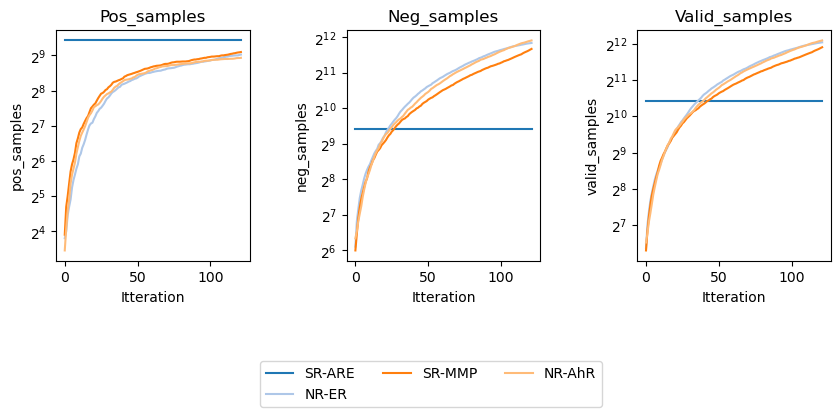

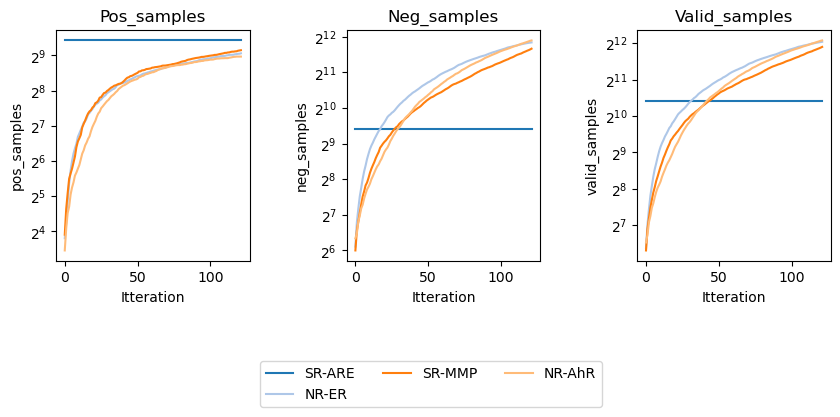

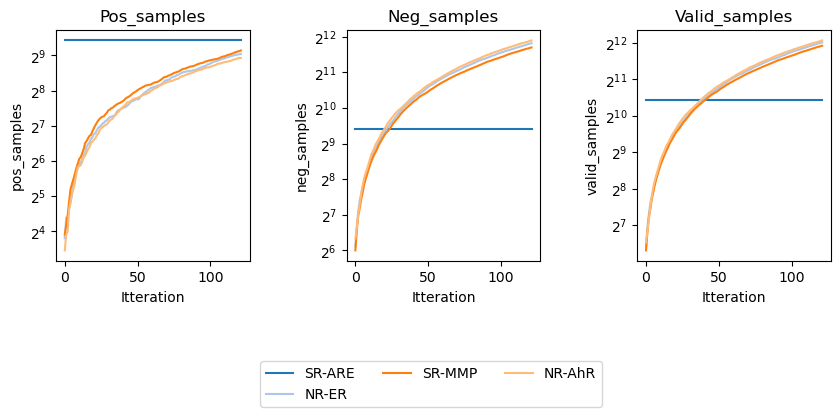

In [ ]:
fig = plot_samples_per_itteration(BALD_samples, use_hue_order = False)
fig = plot_samples_per_itteration(EPIG_samples, use_hue_order = False)
fig = plot_samples_per_itteration(Uniform_samples, use_hue_order = False)


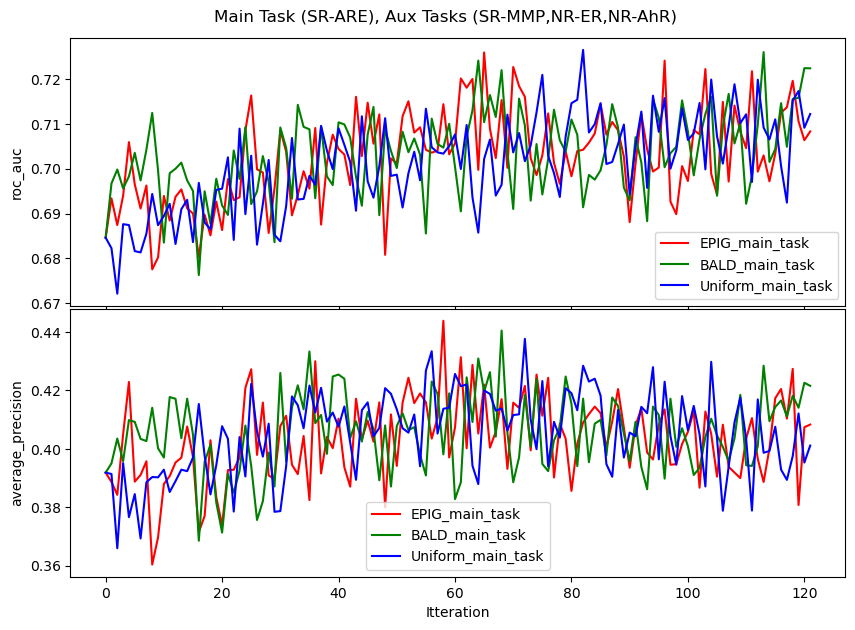

In [ ]:
itera = 122
EPIG_main_task = results_EPIG[results_EPIG.Tasks == config["main_task"][0]].head(itera)
BALD_main_task = results_BALD[results_BALD.Tasks == config["main_task"][0]].head(itera)
Uniform_main_task = results_Uniform[results_Uniform.Tasks == config["main_task"][0]].head(itera)

#metrics_list = ["balanced_acc","f1_score","roc_auc", "AUPR"]
metrics_list = ["roc_auc", "average_precision"]

baseline_main = main_task.head(1)
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (10,7),
                       gridspec_kw = {'wspace':0.5, 'hspace':0.01},
                       #sharey = 'col',
                       sharex = True
                       )

ax = axs.ravel()
for i, metric in enumerate(metrics_list):
    sns.lineplot(data = EPIG_main_task, x = "Itteration", y = metric, label = "EPIG_main_task", ax = ax[i], color = 'Red')
    sns.lineplot(data = BALD_main_task, x = "Itteration", y = metric, label = "BALD_main_task", ax = ax[i], color = 'Green')
    sns.lineplot(data = Uniform_main_task, x = "Itteration", y = metric, label = "Uniform_main_task", ax = ax[i], color = 'Blue')
    #ax[i].axhline(y = baseline_main[metric].values, ls = '--', color = 'Red')
    #ax[i].set_title(metric)
plt.legend()
fig.suptitle("Main Task (SR-ARE), Aux Tasks (SR-MMP,NR-ER,NR-AhR)", y = 0.92)
fig.savefig(f"/projects/home/mmasood1/TG GATE/active_learning/figures/Main_SR_ARE_4_aux/Performance_comparison_random_vs_BALD_EPIG_{itera}_itterations.png",
            dpi = 300)

In [ ]:
config = {"target_file": "/projects/home/mmasood1/arslan_data_repository/Tox21/complete_Tox21.csv",
          "BALD_dir": "/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/Main_Aux_tasks_setting/1_main_remaining_aux/BALD/SR-ARE_SR-MMP",
          "EPIG_dir": "/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/Main_Aux_tasks_setting/1_main_remaining_aux/EPIG/SR-ARE_SR-MMP",
          "Uniform_dir":"/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/Main_Aux_tasks_setting/1_main_remaining_aux/Unfiorm/SR-ARE_SR-MMP"}

data = pd.read_csv(config["target_file"])     
config["main_task"] = ["SR-ARE"]
config["aux_task"] = ["SR-MMP"]

target_names = config["main_task"] + config["aux_task"]
config["selected_tasks"] = target_names

num_itterations = 39
results_BALD = get_results(config["BALD_dir"], num_itterations)
results_EPIG = get_results(config["EPIG_dir"], num_itterations)
results_Uniform = get_results(config["Uniform_dir"], num_itterations)

BALD_samples = get_sample_data(config["BALD_dir"],config["selected_tasks"], num_itterations)
EPIG_samples = get_sample_data(config["EPIG_dir"],config["selected_tasks"], num_itterations)
Uniform_samples = get_sample_data(config["Uniform_dir"],config["selected_tasks"], num_itterations)

Text(0.5, 0.92, 'Main Task (SR-ARE), Aux Tasks (SR-MMP,NR-ER,NR-AhR)')

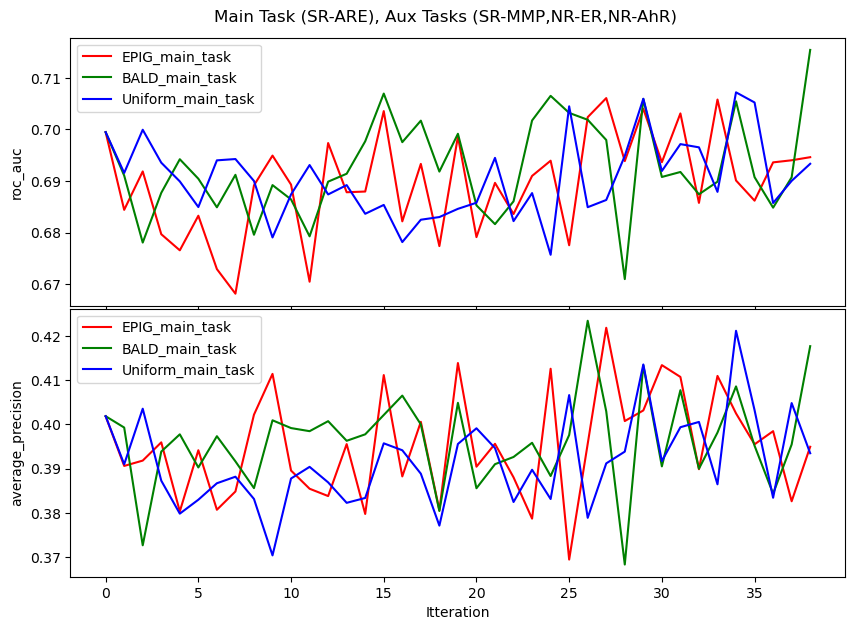

In [ ]:
itera = 39
EPIG_main_task = results_EPIG[results_EPIG.Tasks == config["main_task"][0]].head(itera)
BALD_main_task = results_BALD[results_BALD.Tasks == config["main_task"][0]].head(itera)
Uniform_main_task = results_Uniform[results_Uniform.Tasks == config["main_task"][0]].head(itera)

#metrics_list = ["balanced_acc","f1_score","roc_auc", "AUPR"]
metrics_list = ["roc_auc", "average_precision"]

#baseline_main = main_task.head(1)
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (10,7),
                       gridspec_kw = {'wspace':0.5, 'hspace':0.01},
                       #sharey = 'col',
                       sharex = True
                       )

ax = axs.ravel()
for i, metric in enumerate(metrics_list):
    sns.lineplot(data = EPIG_main_task, x = "Itteration", y = metric, label = "EPIG_main_task", ax = ax[i], color = 'Red')
    sns.lineplot(data = BALD_main_task, x = "Itteration", y = metric, label = "BALD_main_task", ax = ax[i], color = 'Green')
    sns.lineplot(data = Uniform_main_task, x = "Itteration", y = metric, label = "Uniform_main_task", ax = ax[i], color = 'Blue')
    #ax[i].axhline(y = baseline_main[metric].values, ls = '--', color = 'Red')
    #ax[i].set_title(metric)
plt.legend()
fig.suptitle("Main Task (SR-ARE), Aux Tasks (SR-MMP,NR-ER,NR-AhR)", y = 0.92)
#fig.savefig(f"/projects/home/mmasood1/TG GATE/active_learning/figures/Main_SR_ARE_4_aux/Performance_comparison_random_vs_BALD_EPIG_{itera}_itterations.png",
#            dpi = 300)

#1 main Task, 1 Aux task

In [ ]:
corelations = [#'NR-AR',
 'NR-AR-LBD',
 'NR-ER',
 'NR-ER-LBD',
 'SR-ATAD5',
 'SR-ARE',
 'SR-MMP',
 'SR-p53',
 'NR-AhR',
 'NR-Aromatase',
 'NR-PPAR-gamma',
 'SR-HSE']

In [ ]:
# plot 
#--> pos_comp per task
#--> negative compound per task
# --> num of unique compounds per itteration
config = {
    "EPIG_dir":"/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/Main_Aux_tasks_setting/1_main_1_aux/EPIG/",
    "main_task":["NR-AR"]
}

data_all_tasks = pd.DataFrame()
for aux_task in corelations:
    config["aux_task"] = [aux_task]
    config["selected_tasks"] = config["main_task"] + config["aux_task"]

    t_names = config["main_task"][0] + "_" + config["aux_task"][0]
    query_set_dir = config["EPIG_dir"] + t_names +"/query_set/"

    initial_set = pd.read_csv(query_set_dir + "initial_set.csv")
    training_set = initial_set.copy()

    num_itterations = 330
    pos_cmp = pd.DataFrame()
    neg_cmp = pd.DataFrame()
    total_cmp = pd.DataFrame()

    for itteration in range(num_itterations):

        # positives
        pos_cmp_per_itteration = pd.DataFrame((training_set[config["selected_tasks"]] == 1).sum()).T
        pos_cmp_per_itteration.insert(0, "Itteration", itteration)
        pos_cmp = pd.concat([pos_cmp,pos_cmp_per_itteration], axis = 0)

        # negatives
        neg_cmp_per_itteration = pd.DataFrame((training_set[config["selected_tasks"]] == 0).sum()).T
        neg_cmp_per_itteration.insert(0, "Itteration", itteration)
        neg_cmp = pd.concat([neg_cmp,neg_cmp_per_itteration], axis = 0)

        # valid (pos + neg)
        total_cmp_per_itteration = pd.DataFrame(training_set[config["selected_tasks"]].notna().sum()).T
        total_cmp_per_itteration.insert(0, "Itteration", itteration)
        total_cmp = pd.concat([total_cmp,total_cmp_per_itteration], axis = 0)

        query_set = pd.read_csv(query_set_dir + f"/query_set_itteration_{itteration}_s42_alpha_0.0_gamma_0.0_loss_type_BCE_λ0.001.csv")
        training_set = update_training_set(training_set, query_set)

    pos_cmp = pd.melt(frame = pos_cmp, id_vars = "Itteration",var_name = "Task", value_name = "pos_samples") 
    neg_cmp = pd.melt(frame = neg_cmp, id_vars = "Itteration",var_name = "Task", value_name = "neg_samples") 
    total_cmp = pd.melt(frame = total_cmp, id_vars = "Itteration",var_name = "Task", value_name = "valid_samples") 
    sample_data = pd.merge(pd.merge(pos_cmp,neg_cmp,on=["Itteration","Task"]),
                            total_cmp,on=["Itteration","Task"])
    sample_data = sample_data.sort_values(by = "Itteration").reset_index(drop = True)
    max_itteration = sample_data[sample_data.valid_samples == 498].Itteration.max()
    sample_data = sample_data[sample_data.Itteration <= max_itteration]
    data_all_tasks = pd.concat([data_all_tasks,sample_data], axis = 0)

In [ ]:
data = data_all_tasks[data_all_tasks.Task != "NR-AR"].reset_index(drop = True)
#pd.melt(frame = data, id_vars = "Itteration",var_name = "Task", value_name = "valid_samples") 
data

Itteration       Task  pos_samples  neg_samples  valid_samples
0              0  NR-AR-LBD            2           87             89
1              1  NR-AR-LBD           11           98            109
2              2  NR-AR-LBD           14          115            129
3              3  NR-AR-LBD           15          134            149
4              4  NR-AR-LBD           19          150            169
...          ...        ...          ...          ...            ...
2370         213     SR-HSE          216         4133           4349
2371         214     SR-HSE          216         4153           4369
2372         215     SR-HSE          217         4172           4389
2373         216     SR-HSE          217         4192           4409
2374         217     SR-HSE          217         4212           4429

[2375 rows x 5 columns]

In [ ]:
data[data.Itteration == 216]

Itteration           Task  pos_samples  neg_samples  valid_samples
216          216      NR-AR-LBD          156         4253           4409
651          216      NR-ER-LBD          233         4179           4412
882          216       SR-ATAD5          156         4256           4412
1515         216         SR-p53          218         4190           4408
1740         216         NR-AhR          507         3896           4403
2155         216  NR-PPAR-gamma          101         4304           4405
2373         216         SR-HSE          217         4192           4409

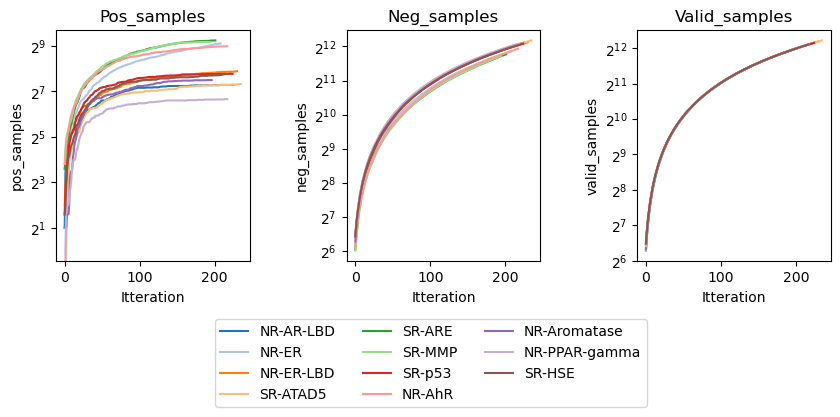

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your existing code to create subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 3),
                        gridspec_kw={'wspace': 0.5, 'hspace': 0.5})

palette = sns.color_palette("tab20", data.Task.nunique())

# Your existing code for plotting on each subplot
ax = axs.ravel()
sns.lineplot(data=data, x="Itteration", y="pos_samples", hue="Task", ax=ax[0], palette=palette, hue_order= corelations)
sns.lineplot(data=data, x="Itteration", y="neg_samples", hue="Task", ax=ax[1], palette=palette, hue_order= corelations)
sns.lineplot(data=data, x="Itteration", y="valid_samples", hue="Task", ax=ax[2], palette=palette, hue_order= corelations)

# Your existing code to remove legends from individual subplots
ax[0].get_legend().remove()
ax[1].get_legend().remove()

# Create a single legend for the entire plot
handles, labels = ax[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=3)
ax[2].get_legend().remove()


# Set titles for subplots
ax[0].set_title("Pos_samples")
ax[1].set_title("Neg_samples")
ax[2].set_title("Valid_samples")

ax[0].set_yscale("log", base = 2)
ax[1].set_yscale("log", base = 2)
ax[2].set_yscale("log", base = 2)
plt.show()

In [ ]:
data_all_tasks = pd.DataFrame()
for aux_task in corelations:
    config["aux_task"] = [aux_task]
    config["selected_tasks"] = config["main_task"] + config["aux_task"]

    t_names = config["main_task"][0] + "_" + config["aux_task"][0]
    result_dir = config["EPIG_dir"] + t_names +"/Results/"

    Results_EPIG = pd.DataFrame()
    for itteration in range(num_itterations):
        result_itteration = pd.read_csv(result_dir + f"itteration_{itteration}_metrics_itteration_{itteration}_s42_alpha_0.0_gamma_0.0_loss_type_BCE_λ0.001.csv")
        result_itteration.insert(0, "Itteration", itteration)
        Results_EPIG = pd.concat([Results_EPIG, result_itteration], axis = 0)
        
    Results_EPIG = Results_EPIG[Results_EPIG.Tasks == config["main_task"][0]]
    Results_EPIG.insert(2, "Aux_task", config["aux_task"][0])
    data_all_tasks = pd.concat([data_all_tasks, Results_EPIG], axis = 0)

In [ ]:
data_all_tasks[data_all_tasks.Itteration == 329].sort_values("roc_auc", ascending = False)

Itteration  Tasks       Aux_task  balanced_acc  f1_score  specificity  \
0         329  NR-AR          NR-ER      0.695960  0.244898     0.755556   
0         329  NR-AR         SR-ARE      0.700438  0.316832     0.928148   
0         329  NR-AR         SR-MMP      0.690842  0.250000     0.872593   
0         329  NR-AR  NR-PPAR-gamma      0.695286  0.308943     0.881481   
0         329  NR-AR       SR-ATAD5      0.682896  0.282051     0.838519   
0         329  NR-AR         SR-p53      0.714209  0.308725     0.882963   
0         329  NR-AR   NR-Aromatase      0.709832  0.239130     0.801481   
0         329  NR-AR         NR-AhR      0.688653  0.326087     0.831852   
0         329  NR-AR         SR-HSE      0.706801  0.333333     0.868148   
0         329  NR-AR      NR-ER-LBD      0.685286  0.230769     0.861481   
0         329  NR-AR      NR-AR-LBD      0.682492  0.228261     0.874074   

   sensitivity   roc_auc      AUPR  average_precision       ECE       ACE  
0     0.636364  0.736444  0.108444           0.113370  0.452833  0.453656  
0     0.472727  0.733131  0.152763           0.159174  0.437134  0.437390  
0     0.509091  0.723811  0.131588           0.141816  0.479893  0.480568  
0     0.509091  0.718316  0.168613           0.178171  0.537019  0.538364  
0     0.527273  0.711502  0.108708           0.112664  0.533859  0.535683  
0     0.545455  0.711434  0.155785           0.163559  0.479031  0.479913  
0     0.618182  0.710384  0.104907           0.108798  0.461080  0.465117  
0     0.545455  0.703219  0.184309           0.190819  0.471863  0.475964  
0     0.545455  0.702788  0.156923           0.163719  0.494768  0.498394  
0     0.509091  0.701737  0.098444           0.103297  0.468116  0.469143  
0     0.490909  0.701428  0.098790           0.102640  0.459679  0.461842

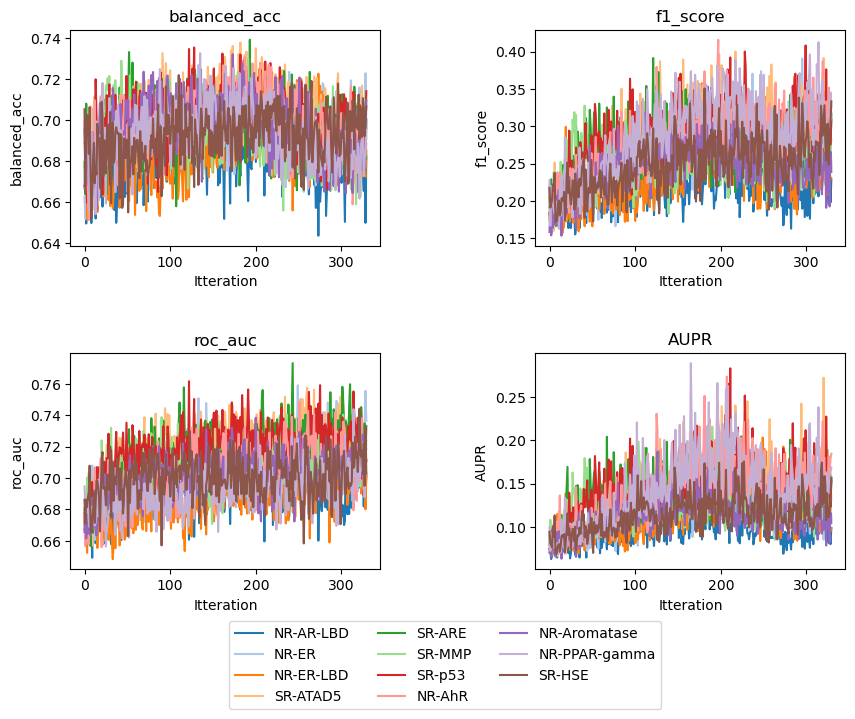

In [ ]:
metrics_list = ["balanced_acc","f1_score","roc_auc", "average_precision"]
baseline_main = main_task.head(num_itterations)
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,7),
                       gridspec_kw = {'wspace':0.5, 'hspace':0.5},
                       #sharey = 'col',
                       #sharex = True
                       )

ax = axs.ravel()
palette = sns.color_palette("tab20", data_all_tasks.Aux_task.nunique())

for i, metric in enumerate(metrics_list):
    sns.lineplot(data = data_all_tasks, x = "Itteration", y = metric, hue = 'Aux_task', 
                 ax = ax[i], palette=palette, hue_order= corelations)
    #sns.lineplot(data = data_all_tasks, x = "Itteration", y = metric, label = "Aux_task", ax = ax[i], color = 'Green')
    #ax[i].axhline(y = baseline_main[metric].values, ls = '--', color = 'Red')
    ax[i].set_title(metric)

# Your existing code to remove legends from individual subplots
ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[3].get_legend().remove()


# Create a single legend for the entire plot
handles, labels = ax[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)
ax[2].get_legend().remove()

#fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/Performance_comparison_random_vs_BALD.png",
#            dpi = 300)

In [ ]:
Max_ROC_AUC = pd.DataFrame(data_all_tasks.groupby("Aux_task")["roc_auc"].max())
Max_ROC_AUC.loc[corelations].reset_index()
# MAin task: NR-AR
# EPIG (11 active learning loops)

Aux_task   roc_auc
0       NR-AR-LBD  0.726330
1           NR-ER  0.759057
2       NR-ER-LBD  0.726007
3        SR-ATAD5  0.757522
4          SR-ARE  0.773212
5          SR-MMP  0.740471
6          SR-p53  0.761630
7          NR-AhR  0.748620
8    NR-Aromatase  0.738330
9   NR-PPAR-gamma  0.743838
10         SR-HSE  0.744189

In [ ]:
valid_samples = pd.DataFrame(data.groupby("Task")["valid_samples"].max()).reset_index()
pos_samples = pd.DataFrame(data.groupby("Task")["pos_samples"].max()).reset_index()
neg_samples = pd.DataFrame(data.groupby("Task")["neg_samples"].max()).reset_index()
num_samples = pd.merge(valid_samples,pos_samples, on = "Task")
num_samples = pd.merge(num_samples,neg_samples, on = "Task")
num_samples = pd.merge(Max_ROC_AUC,num_samples, left_on = "Aux_task", right_on = "Task")
#num_samples = num_samples.sort_values(by = "pos_samples")
num_samples

roc_auc           Task  valid_samples  pos_samples  neg_samples
0   0.726330      NR-AR-LBD           4589          156         4433
1   0.748620         NR-AhR           4423          507         3916
2   0.738330   NR-Aromatase           4000          181         3819
3   0.759057          NR-ER           4241          552         3689
4   0.726007      NR-ER-LBD           4692          237         4455
5   0.743838  NR-PPAR-gamma           4424          101         4323
6   0.773212         SR-ARE           4097          606         3491
7   0.757522       SR-ATAD5           4792          160         4632
8   0.744189         SR-HSE           4429          217         4212
9   0.740471         SR-MMP           3959          578         3381
10  0.761630         SR-p53           4568          219         4349

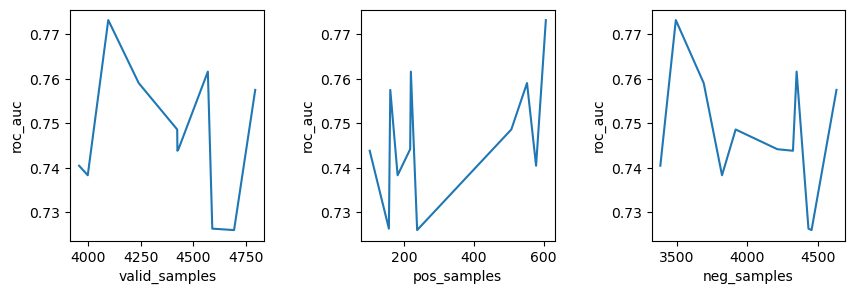

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (10,3),
                       gridspec_kw = {'wspace':0.5, 'hspace':0.5},
                       #sharey = 'col',
                       #sharex = True
                       )

metrics_list = ["valid_samples","pos_samples","neg_samples"]
for i, metric in enumerate(metrics_list):
    sns.lineplot(data = num_samples, x = metric, y = "roc_auc",
                 ax = ax[i])

# Single Task

# SR-ARE, n_query 20

In [ ]:
config = {"target_file": "/projects/home/mmasood1/arslan_data_repository/Tox21/complete_Tox21.csv",
          "BALD_dir": "/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/Main_Aux_tasks_setting/1_main_0_aux/BALD/SR-ARE",
          "EPIG_dir": "/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/Main_Aux_tasks_setting/1_main_0_aux/EPIG/SR-ARE",
          "Uniform_dir":"/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/Main_Aux_tasks_setting/1_main_0_aux/Unfiorm/SR-ARE"}

data = pd.read_csv(config["target_file"])     
all_tasks = data.loc[:, "NR-AR":"SR-p53"].columns.tolist()
config["main_task"] = ["SR-ARE"]

target_names = config["main_task"]# + config["aux_task"]
config["selected_tasks"] = target_names

In [ ]:
num_itterations = 197
results_BALD = get_results(config["BALD_dir"], num_itterations)
results_EPIG = get_results(config["EPIG_dir"], num_itterations)
results_Uniform = get_results(config["Uniform_dir"], num_itterations)

BALD_samples = get_sample_data(config["BALD_dir"],config["selected_tasks"], num_itterations)
EPIG_samples = get_sample_data(config["EPIG_dir"],config["selected_tasks"], num_itterations)
Uniform_samples = get_sample_data(config["Uniform_dir"],config["selected_tasks"], num_itterations)

In [ ]:
results_BALD["Acq_Func"] = "BALD"
results_EPIG["Acq_Func"] = "EPIG"
results_Uniform["Acq_Func"] = "Uniform"

BALD_samples["Acq_Func"] = "BALD"
EPIG_samples["Acq_Func"] = "EPIG"
Uniform_samples["Acq_Func"] = "Uniform"

sample_data = pd.concat([BALD_samples,EPIG_samples,Uniform_samples])
result_data = pd.concat([results_BALD,results_EPIG,results_Uniform])
result_data = result_data[result_data.Tasks == config["main_task"][0]]

Text(0.5, 1.0, 'Valid_samples')

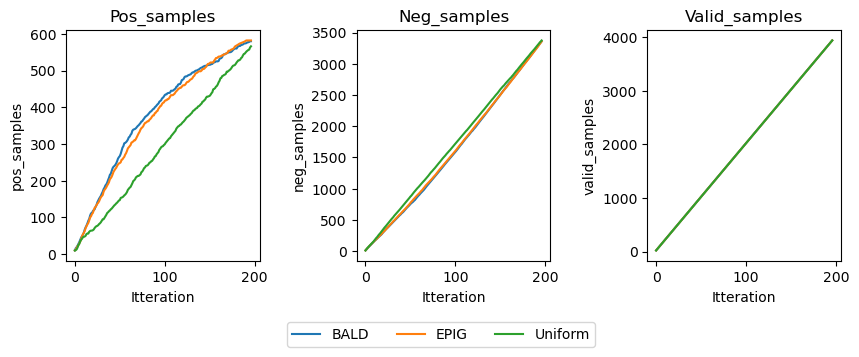

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 3),
                            gridspec_kw={'wspace': 0.5, 'hspace': 0.5})

# Your existing code for plotting on each subplot
ax = axs.ravel()
sns.lineplot(data=sample_data, x="Itteration", y="pos_samples", hue="Acq_Func", ax=ax[0])
sns.lineplot(data=sample_data, x="Itteration", y="neg_samples", hue="Acq_Func", ax=ax[1])
sns.lineplot(data=sample_data, x="Itteration", y="valid_samples", hue="Acq_Func", ax=ax[2])

# Your existing code to remove legends from individual subplots
ax[0].get_legend().remove()
ax[1].get_legend().remove()

# Create a single legend for the entire plot
handles, labels = ax[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3)
ax[2].get_legend().remove()


# Set titles for subplots
ax[0].set_title("Pos_samples")
ax[1].set_title("Neg_samples")
ax[2].set_title("Valid_samples")

#fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/sample_comparison_random_vs_BALD_EPIG.png",
#            dpi = 300, bbox_inches='tight')

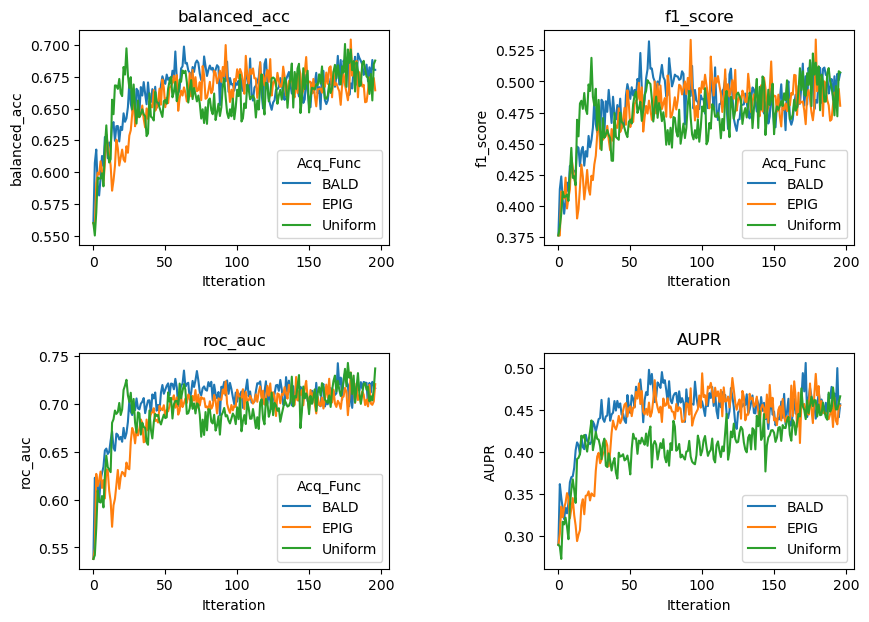

In [ ]:
metrics_list = ["balanced_acc","f1_score","roc_auc", "average_precision"]
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,7),
                    gridspec_kw = {'wspace':0.5, 'hspace':0.5},
                    #sharey = 'col',
                    #sharex = True
                    )

ax = axs.ravel()
for i, metric in enumerate(metrics_list):
    sns.lineplot(data = result_data, x = "Itteration", y = metric, hue = "Acq_Func", ax = ax[i], color = 'Red')
    #ax[i].axhline(y = baseline_main[metric].values, ls = '--', color = 'Red')
    ax[i].set_title(metric)
plt.legend()
#fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/Performance_comparison_random_vs_BALD_EPIG.png",
#            dpi = 300)

# SR-ARE, n_query = 1

In [ ]:
config = {"target_file": "/projects/home/mmasood1/arslan_data_repository/Tox21/complete_Tox21.csv",
          "BALD_dir": "/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/Main_Aux_tasks_setting/1_main_0_aux/BALD_nquery_1/SR-ARE",
          "EPIG_dir": "/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/Main_Aux_tasks_setting/1_main_0_aux/EPIG_nquery_1/SR-ARE",
          "Uniform_dir":"/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/Main_Aux_tasks_setting/1_main_0_aux/Unfiorm_nquery_1/SR-ARE"}

data = pd.read_csv(config["target_file"])     
all_tasks = data.loc[:, "NR-AR":"SR-p53"].columns.tolist()
config["main_task"] = ["SR-ARE"]

target_names = config["main_task"]# + config["aux_task"]
config["selected_tasks"] = target_names

In [ ]:

num_itterations = 300
results_BALD = get_results(config["BALD_dir"], num_itterations)
results_EPIG = get_results(config["EPIG_dir"], num_itterations)
results_Uniform = get_results(config["Uniform_dir"], num_itterations)

BALD_samples = get_sample_data(config["BALD_dir"],config["selected_tasks"], num_itterations)
EPIG_samples = get_sample_data(config["EPIG_dir"],config["selected_tasks"], num_itterations)
Uniform_samples = get_sample_data(config["Uniform_dir"],config["selected_tasks"], num_itterations)

In [ ]:
results_BALD["Acq_Func"] = "BALD"
results_EPIG["Acq_Func"] = "EPIG"
results_Uniform["Acq_Func"] = "Uniform"

BALD_samples["Acq_Func"] = "BALD"
EPIG_samples["Acq_Func"] = "EPIG"
Uniform_samples["Acq_Func"] = "Uniform"

sample_data = pd.concat([BALD_samples,EPIG_samples,Uniform_samples])
result_data = pd.concat([results_BALD,results_EPIG,results_Uniform])
result_data = result_data[result_data.Tasks == config["main_task"][0]]

Text(0.5, 1.0, 'Valid_samples')

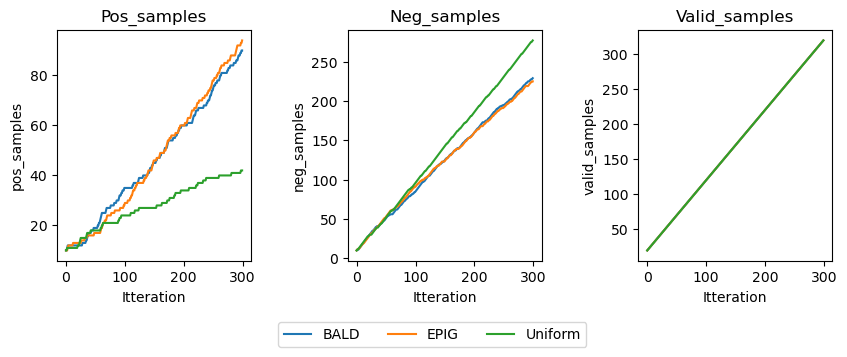

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 3),
                            gridspec_kw={'wspace': 0.5, 'hspace': 0.5})

# Your existing code for plotting on each subplot
ax = axs.ravel()
sns.lineplot(data=sample_data, x="Itteration", y="pos_samples", hue="Acq_Func", ax=ax[0])
sns.lineplot(data=sample_data, x="Itteration", y="neg_samples", hue="Acq_Func", ax=ax[1])
sns.lineplot(data=sample_data, x="Itteration", y="valid_samples", hue="Acq_Func", ax=ax[2])

# Your existing code to remove legends from individual subplots
ax[0].get_legend().remove()
ax[1].get_legend().remove()

# Create a single legend for the entire plot
handles, labels = ax[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3)
ax[2].get_legend().remove()


# Set titles for subplots
ax[0].set_title("Pos_samples")
ax[1].set_title("Neg_samples")
ax[2].set_title("Valid_samples")

#fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/Samples_Random_vs_BALD_EPIG_SR_ARE_nquery1.png",
#            dpi = 300, bbox_inches='tight')

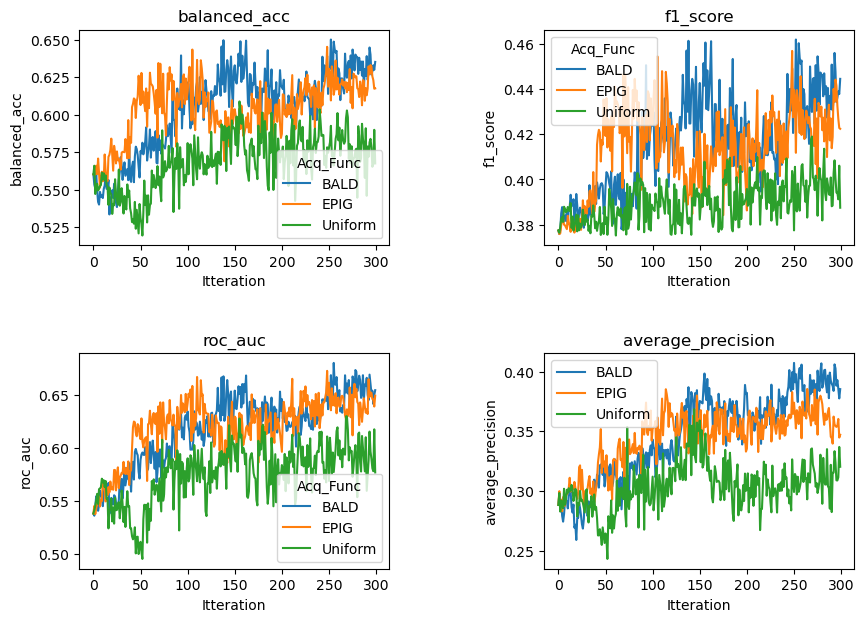

In [ ]:
metrics_list = ["balanced_acc","f1_score","roc_auc", "average_precision"]
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,7),
                    gridspec_kw = {'wspace':0.5, 'hspace':0.5},
                    #sharey = 'col',
                    #sharex = True
                    )

ax = axs.ravel()
for i, metric in enumerate(metrics_list):
    sns.lineplot(data = result_data, x = "Itteration", y = metric, hue = "Acq_Func", ax = ax[i], color = 'Red')
    #ax[i].axhline(y = baseline_main[metric].values, ls = '--', color = 'Red')
    ax[i].set_title(metric)
plt.legend()
#fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/Evaluation_Random_vs_BALD_EPIG_SR_ARE_nquery1.png",
#            dpi = 300)

# NR-AR, n_query = 1

In [ ]:
config = {"target_file": "/projects/home/mmasood1/arslan_data_repository/Tox21/complete_Tox21.csv",
          "BALD_dir": "/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/Main_Aux_tasks_setting/1_main_0_aux/BALD_NR_AR_nquery_1/NR-AR",
          "EPIG_dir": "/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/Main_Aux_tasks_setting/1_main_0_aux/EPIG_NR_AR_nquery_1/NR-AR",
          "Uniform_dir":"/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/Main_Aux_tasks_setting/1_main_0_aux/Unfiorm_NR_AR_nquery_1/NR-AR"}

data = pd.read_csv(config["target_file"])     
all_tasks = data.loc[:, "NR-AR":"SR-p53"].columns.tolist()
config["main_task"] = ["NR-AR"]

target_names = config["main_task"]# + config["aux_task"]
config["selected_tasks"] = target_names

In [ ]:
num_itterations = 197
results_BALD = get_results(config["BALD_dir"], num_itterations)
results_EPIG = get_results(config["EPIG_dir"], num_itterations)
results_Uniform = get_results(config["Uniform_dir"], num_itterations)

BALD_samples = get_sample_data(config["BALD_dir"],config["selected_tasks"], num_itterations)
EPIG_samples = get_sample_data(config["EPIG_dir"],config["selected_tasks"], num_itterations)
Uniform_samples = get_sample_data(config["Uniform_dir"],config["selected_tasks"], num_itterations)

In [ ]:
results_BALD["Acq_Func"] = "BALD"
results_EPIG["Acq_Func"] = "EPIG"
results_Uniform["Acq_Func"] = "Uniform"

BALD_samples["Acq_Func"] = "BALD"
EPIG_samples["Acq_Func"] = "EPIG"
Uniform_samples["Acq_Func"] = "Uniform"

sample_data = pd.concat([BALD_samples,EPIG_samples,Uniform_samples])
result_data = pd.concat([results_BALD,results_EPIG,results_Uniform])
result_data = result_data[result_data.Tasks == config["main_task"][0]]

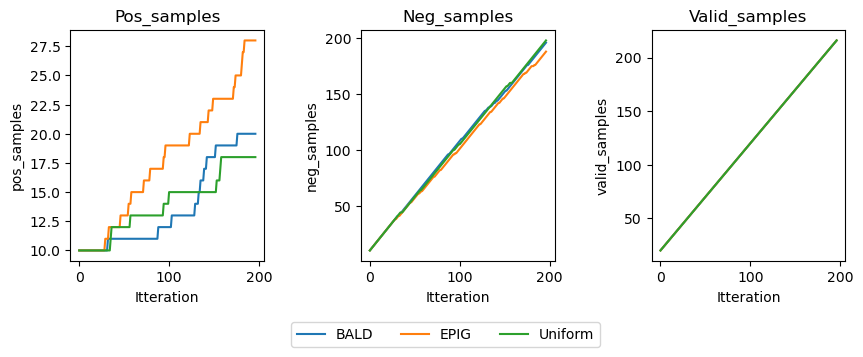

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 3),
                            gridspec_kw={'wspace': 0.5, 'hspace': 0.5})

# Your existing code for plotting on each subplot
ax = axs.ravel()
sns.lineplot(data=sample_data, x="Itteration", y="pos_samples", hue="Acq_Func", ax=ax[0])
sns.lineplot(data=sample_data, x="Itteration", y="neg_samples", hue="Acq_Func", ax=ax[1])
sns.lineplot(data=sample_data, x="Itteration", y="valid_samples", hue="Acq_Func", ax=ax[2])

# Your existing code to remove legends from individual subplots
ax[0].get_legend().remove()
ax[1].get_legend().remove()

# Create a single legend for the entire plot
handles, labels = ax[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3)
ax[2].get_legend().remove()


# Set titles for subplots
ax[0].set_title("Pos_samples")
ax[1].set_title("Neg_samples")
ax[2].set_title("Valid_samples")

fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/Samples_Random_vs_BALD_EPIG_NR_AR_nquery1.png",
            dpi = 300, bbox_inches='tight')

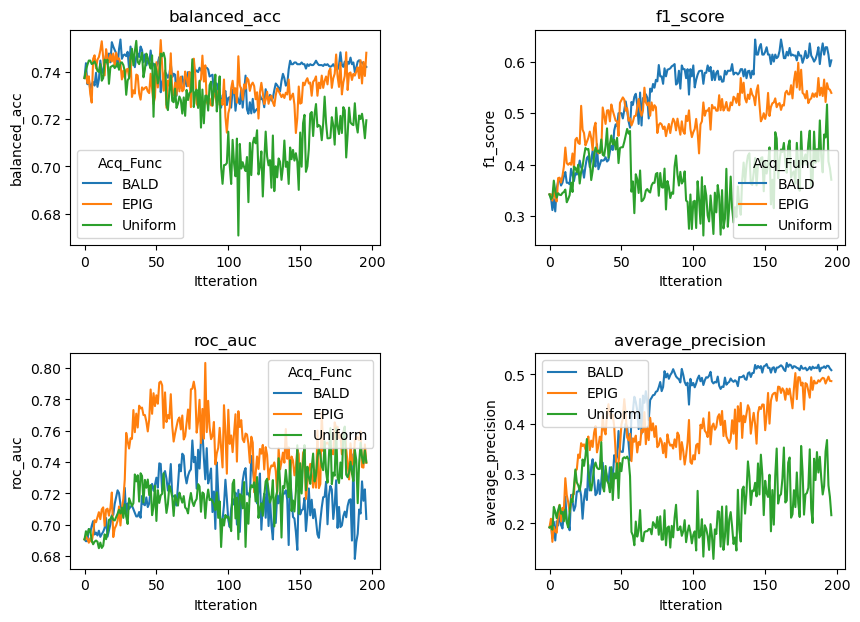

In [ ]:
metrics_list = ["balanced_acc","f1_score","roc_auc", "average_precision"]
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,7),
                    gridspec_kw = {'wspace':0.5, 'hspace':0.5},
                    #sharey = 'col',
                    #sharex = True
                    )

ax = axs.ravel()
for i, metric in enumerate(metrics_list):
    sns.lineplot(data = result_data, x = "Itteration", y = metric, hue = "Acq_Func", ax = ax[i], color = 'Red')
    #ax[i].axhline(y = baseline_main[metric].values, ls = '--', color = 'Red')
    ax[i].set_title(metric)
plt.legend()
fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/Evaluation_Random_vs_BALD_EPIG_NR_AR_nquery1.png",
            dpi = 300)

# Comapre BALD, EPIG, ECFP for ECFP, and BERT

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from utils.data_utils import get_random_query_set, get_query_set, update_training_set, remove_queried_index_from_pool_set

Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (/home/mmasood1/.conda/envs/env_arslan/lib/python3.9/site-packages/deepchem/models/torch_models/__init__.py)
Skipped loading some Jax models, missing a dependency. No module named 'jax'


In [2]:
def get_results(model_dir, itteration):
    seed_list = [42, 0, 88, 100, 142]
    results_all = pd.DataFrame()
    for seed in seed_list:
        for itteration in range(num_itterations):
            try:
                result_itteration = pd.read_csv(model_dir + f"/Results/itteration_{itteration}_metrics_itteration_{itteration}_s{seed}_alpha_0.0_gamma_0.0_loss_type_BCE_λ0.01.csv")
                result_itteration.insert(0, "Itteration", itteration)
                result_itteration.insert(0, "seed", seed)
                results_all = pd.concat([results_all, result_itteration], axis = 0)
            except:
                pass
    return results_all

def get_sample_data(result_dir,selected_tasks,num_itterations):
    initial_set = pd.read_csv(result_dir + f"{selected_tasks}/query_set/initial_set.csv")
    training_set = initial_set.copy()

    pos, neg = [], []

    for itteration in range(num_itterations):
        pos.append((training_set[selected_tasks] == 1).sum())
        neg.append((training_set[selected_tasks] == 0).sum())
        query_set = pd.read_csv(result_dir + f"{selected_tasks}/query_set/query_set_itteration_{itteration}_s42_alpha_0.0_gamma_0.0_loss_type_BCE_λ0.01.csv")
        training_set = update_training_set(training_set, query_set)

    sample_data = pd.DataFrame({"pos": pos,
                                "neg": neg})
    sample_data["valid"] =   sample_data["pos"] + sample_data["neg"]  
    sample_data["Itteration"] =   range(num_itterations)                      
                    
    return sample_data


In [3]:
config = {"target_file": "/projects/home/mmasood1/arslan_data_repository/Tox21/complete_Tox21.csv",
          "Uniform_BERT_dir":"/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/Main_Aux_tasks_setting/1_main_0_aux/uniform/",
          "BALD_BERT_dir": "/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/Main_Aux_tasks_setting/1_main_0_aux/BALD/",
          "EPIG_BERT_dir": "/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/Main_Aux_tasks_setting/1_main_0_aux/EPIG_MT/",
          "Uniform_ECFP_dir":"/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/Main_Aux_tasks_setting/1_main_0_aux/ECFP/uniform/",
          "BALD_ECFP_dir": "/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/Main_Aux_tasks_setting/1_main_0_aux/ECFP/BALD/",
          "EPIG_ECFP_dir": "/projects/home/mmasood1/trained_model_predictions/Tox21/Frozen_BERT/Main_Aux_tasks_setting/1_main_0_aux/ECFP/EPIG_MT/"}

data = pd.read_csv(config["target_file"])  
data.drop("SMILES", axis = 1, inplace = True)   
all_tasks = data.loc[:, "NR-AR":"SR-p53"].columns.tolist()

In [4]:
def combine_results(config, features, task_wise_mean = True):
    Uniform_BERT,BALD_BERT,EPIG_BERT = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    for task in all_tasks:
        print(task)
        Uniform_b = get_results(config[f"Uniform_{features}_dir"] + task, num_itterations)
        BALD_b = get_results(config[f"BALD_{features}_dir"] + task, num_itterations)
        EPIG_b = get_results(config[f"EPIG_{features}_dir"] + task, num_itterations)

        # BERT
        Uniform_b = Uniform_b[Uniform_b.Tasks == task]
        BALD_b = BALD_b[BALD_b.Tasks == task]
        EPIG_b = EPIG_b[EPIG_b.Tasks == task]

        Uniform_BERT = pd.concat([Uniform_BERT,Uniform_b], axis = 0)
        BALD_BERT = pd.concat([BALD_BERT,BALD_b], axis = 0)
        EPIG_BERT = pd.concat([EPIG_BERT,EPIG_b], axis = 0)


    if task_wise_mean:
        Uniform_BERT = Uniform_BERT.groupby(["Itteration","seed"]).mean(numeric_only = True).reset_index()
        BALD_BERT = BALD_BERT.groupby(["Itteration","seed"]).mean(numeric_only = True).reset_index()
        EPIG_BERT = EPIG_BERT.groupby(["Itteration","seed"]).mean(numeric_only = True).reset_index()

    Uniform_BERT["Acq_Func"] = f"{features}_Uniform"
    BALD_BERT["Acq_Func"] = f"{features}_BALD"
    EPIG_BERT["Acq_Func"] = f"{features}_EPIG"

    result_data = pd.concat([Uniform_BERT,BALD_BERT,EPIG_BERT])
    result_data["Features"] = features
    return result_data

In [5]:
def combine_samples(config, features):
    Uniform_BERT,BALD_BERT,EPIG_BERT = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    for task in all_tasks:

        Uniform_b = get_sample_data(config[f"Uniform_{features}_dir"], task, num_itterations)
        BALD_b = get_sample_data(config[f"BALD_{features}_dir"],task, num_itterations)
        EPIG_b = get_sample_data(config[f"EPIG_{features}_dir"], task, num_itterations)

        Uniform_BERT = pd.concat([Uniform_BERT,Uniform_b], axis = 0)
        BALD_BERT = pd.concat([BALD_BERT,BALD_b], axis = 0)
        EPIG_BERT = pd.concat([EPIG_BERT,EPIG_b], axis = 0)

    Uniform_BERT["Acq_Func"] = f"{features}_Uniform"
    BALD_BERT["Acq_Func"] = f"{features}_BALD"
    EPIG_BERT["Acq_Func"] = f"{features}_EPIG"

    result_data = pd.concat([Uniform_BERT,BALD_BERT,EPIG_BERT])
    result_data["Features"] = features
    return result_data

In [18]:
num_itterations = 200
BERT = combine_results(config, "BERT")
#BERT_samples = combine_samples(config, "BERT")
#result_data = pd.concat([BERT,ECFP])

NR-AR


NR-AR-LBD
NR-AhR
NR-Aromatase
NR-ER
NR-ER-LBD
NR-PPAR-gamma
SR-ARE
SR-ATAD5
SR-HSE
SR-MMP
SR-p53


In [19]:
num_itterations = 200
ECFP = combine_results(config, "ECFP")

NR-AR
NR-AR-LBD
NR-AhR
NR-Aromatase
NR-ER
NR-ER-LBD
NR-PPAR-gamma
SR-ARE
SR-ATAD5
SR-HSE
SR-MMP
SR-p53


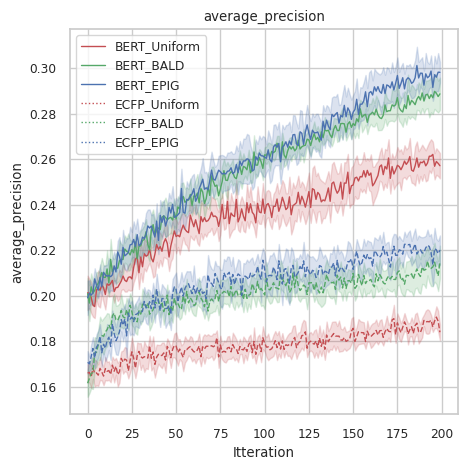

In [20]:
metrics_list = ["average_precision"]
#metrics_list = ["balanced_acc","f1_score","roc_auc", "average_precision"]
sns.set(font_scale=0.8)  # crazy big
sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5),
                    gridspec_kw = {'wspace':0.5, 'hspace':0.5},
                    #sharey = 'col',
                    #sharex = True
                    )

for i, metric in enumerate(metrics_list):
    sns.lineplot(data = BERT, x = "Itteration", y = metric, 
                hue = "Acq_Func", ax = ax, linestyle = "-", 
                palette=['r', 'g','b'], lw = 1, errorbar = "se")
    

    sns.lineplot(data = ECFP, x = "Itteration", y = metric, 
                hue = "Acq_Func", ax = ax, linestyle = "--", 
                palette=['r', 'g','b'], lw = 1, errorbar = "se")

    #ax[i].axhline(y = baseline_main[metric].values, ls = '--', color = 'Red')
    ax.set_title(metric)

leg = ax.legend(loc = "upper left")
leg_lines = leg.get_lines()
leg_lines[3].set_linestyle(":")
leg_lines[4].set_linestyle(":")
leg_lines[5].set_linestyle(":")


fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/ECFP_BERT_Uniform_vs_BALD_EPIG.png",
            dpi = 300)

In [21]:
BERT_samples = combine_samples(config, "BERT")
ECFP_samples = combine_samples(config, "ECFP")

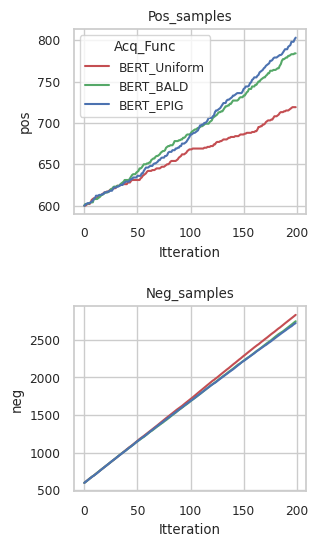

In [27]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(3, 6),
                            gridspec_kw={'wspace': 0.5, 'hspace': 0.5})

BERT = BERT_samples.groupby(["Itteration","Acq_Func"]).sum(numeric_only = True).reset_index()
ECFP = ECFP_samples.groupby(["Itteration","Acq_Func"]).sum(numeric_only = True).reset_index()

# Your existing code for plotting on each subplot
ax = axs.ravel()

sns.lineplot(data=BERT, x="Itteration", y="pos", linestyle = "-",hue="Acq_Func",palette=['r', 'g','b'], 
             ax=ax[0], hue_order = ["BERT_Uniform","BERT_BALD","BERT_EPIG"])

sns.lineplot(data=BERT, x="Itteration", y="neg", linestyle = "-",hue="Acq_Func", palette=['r', 'g','b'], 
             ax=ax[1], hue_order = ["BERT_Uniform","BERT_BALD","BERT_EPIG"])
#sns.lineplot(data=BERT, x="Itteration", y="valid", linestyle = "-",hue="Acq_Func", ax=ax[2])


# Your existing code to remove legends from individual subplots
#ax[0].get_legend().remove()
ax[1].get_legend().remove()

# Create a single legend for the entire plot
#handles, labels = ax[2].get_legend_handles_labels()
#leg = fig.legend(handles, labels, loc='lower center', 
#                 bbox_to_anchor=(0.5, -0.2), ncol=3)
#ax[2].get_legend().remove()


# Set titles for subplots
ax[0].set_title("Pos_samples")
ax[1].set_title("Neg_samples")
#ax[2].set_title("Valid_samples")

fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/Samples_Random_vs_BALD_EPIG.png",
            dpi = 300, bbox_inches='tight')

In [16]:
BERT_samples.groupby(["Itteration","Acq_Func"]).sum(numeric_only = True).reset_index()

Itteration      Acq_Func  pos   neg  valid
0             0     BERT_BALD  600   600   1200
1             0     BERT_EPIG  600   600   1200
2             0  BERT_Uniform  600   600   1200
3             1     BERT_BALD  602   610   1212
4             1     BERT_EPIG  601   611   1212
..          ...           ...  ...   ...    ...
595         198     BERT_EPIG  841  2735   3576
596         198  BERT_Uniform  735  2841   3576
597         199     BERT_BALD  816  2772   3588
598         199     BERT_EPIG  843  2745   3588
599         199  BERT_Uniform  735  2853   3588

[600 rows x 5 columns]

In [15]:
BERT_samples

pos  neg  valid  Itteration      Acq_Func Features
0     50   50    100           0  BERT_Uniform     BERT
1     50   51    101           1  BERT_Uniform     BERT
2     50   52    102           2  BERT_Uniform     BERT
3     50   53    103           3  BERT_Uniform     BERT
4     50   54    104           4  BERT_Uniform     BERT
..   ...  ...    ...         ...           ...      ...
195   70  225    295         195     BERT_EPIG     BERT
196   70  226    296         196     BERT_EPIG     BERT
197   70  227    297         197     BERT_EPIG     BERT
198   70  228    298         198     BERT_EPIG     BERT
199   70  229    299         199     BERT_EPIG     BERT

[7200 rows x 6 columns]

In [39]:
num_itterations = 200
BERT = combine_results(config, "BERT", task_wise_mean = False)
ECFP = combine_results(config, "ECFP", task_wise_mean = False)

NR-AR


NR-AR-LBD
NR-AhR
NR-Aromatase
NR-ER
NR-ER-LBD
NR-PPAR-gamma
SR-ARE
SR-ATAD5
SR-HSE
SR-MMP
SR-p53
NR-AR
NR-AR-LBD
NR-AhR
NR-Aromatase
NR-ER
NR-ER-LBD
NR-PPAR-gamma
SR-ARE
SR-ATAD5
SR-HSE
SR-MMP
SR-p53


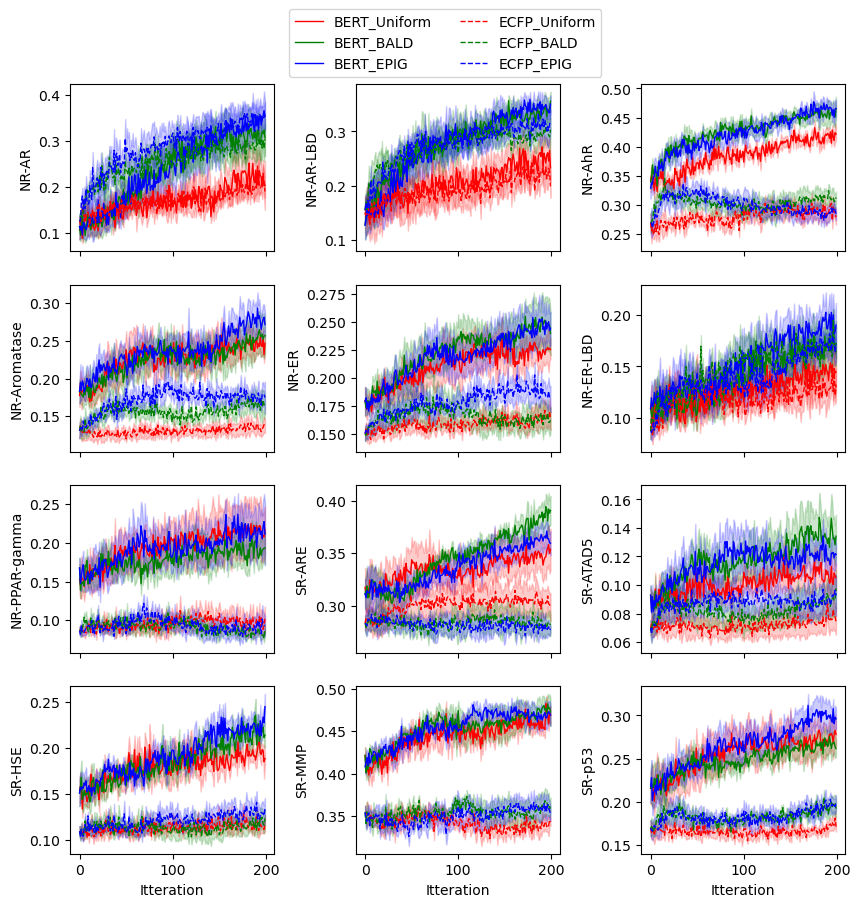

In [40]:
#metrics_list = ["balanced_acc","f1_score","roc_auc", "average_precision"]
metric = ["average_precision"]
fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize = (10,10),
                    gridspec_kw = {'wspace':0.4, 'hspace':0.2},
                    sharex = True,
                    #sharex = True
                    )
'''
fig, axs = plt.subplots(nrows = 12, ncols = 1, figsize = (10,30),
                    gridspec_kw = {'wspace':0.5, 'hspace':0.2},
                    sharex = True,
                    #sharex = True
                    )
'''

ax = axs.ravel()
task_list = BERT.Tasks.unique()
for i, task in enumerate(task_list):
    data = BERT[BERT.Tasks == task]
    sns.lineplot(data = data, x = "Itteration", y = metric[0], 
                #hue_order = ["BERT_Uniform","BERT_BALD","BERT_EPIG"], 
                palette=['r', 'g','b'], lw = 1,
                hue = "Acq_Func", linestyle = "-",
                ax = ax[i],errorbar = "se")

    data = ECFP[ECFP.Tasks == task]
    sns.lineplot(data = data, x = "Itteration", y = metric[0], 
            #hue_order = ["BERT_Uniform","BERT_BALD","BERT_EPIG"], 
            palette=['r', 'g','b'], lw = 1,
            hue = "Acq_Func", linestyle = "--",
            ax = ax[i],errorbar = "se")
    #ax[i].axhline(y = baseline_main[metric].values, ls = '--', color = 'Red')
    ax[i].set_ylabel(task)
    if i != 0:
        ax[i].get_legend().remove()

leg = ax[0].legend(loc = "upper left")
leg_lines = leg.get_lines()
leg_lines[3].set_linestyle(":")
leg_lines[4].set_linestyle(":")
leg_lines[5].set_linestyle(":")

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.88), ncol=2)
ax[0].get_legend().remove()

#plt.legend()
fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/Random_vs_BALD_EPIG_taskwise_comparison2.png",
            dpi = 300)

In [31]:
import os
import pandas as pd
import numpy as np

import torch
import deepchem as dc
from pytorch_lightning import seed_everything

import wandb
os.environ["WANDB_SILENT"] = "true"
wandb.login(key = "27edf9c66b032c03f72d30e923276b93aa736429")

import torch.multiprocessing as mp
import gc
torch.multiprocessing.set_sharing_strategy('file_system')

from utils.data_utils import scafoldsplit_train_test, convert_to_dataframe, get_initial_set_with_main_and_aux_samples, drop_unwanted_tasks
from utils.data_utils import convert_dataframe_to_dataloader

from utils.utils import wandb_init_model, compute_binary_classification_metrics_MT, active_learning_loop
from utils.model_utils import get_pred_with_uncertainities
import torch.multiprocessing
torch.multiprocessing.set_sharing_strategy('file_system')

In [33]:
data = pd.read_csv("/projects/home/mmasood1/arslan_data_repository/Tox21/complete_Tox21.csv")
all_tasks = data.loc[:, "NR-AR":"SR-p53"].columns.tolist()
for i, task in enumerate(all_tasks):
    print(i, task)

0 NR-AR
1 NR-AR-LBD
2 NR-AhR
3 NR-Aromatase
4 NR-ER
5 NR-ER-LBD
6 NR-PPAR-gamma
7 SR-ARE
8 SR-ATAD5
9 SR-HSE
10 SR-MMP
11 SR-p53
